# Data Visualisation

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import randint, uniform, loguniform
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/MyDrive/Final_Concrete_Dataset.csv')

# Display the first few rows of the dataset
dataset.head()

Mounted at /content/drive


Cement kg/mÂ³  Fly Ash kg/mÂ³  Silica Fume kg/mÂ³  Coarse Aggregate kg/mÂ³  \
0          400.0            30.0                 0.0                  1221.00   
1          400.0            30.0                 0.0                  1221.00   
2          400.0            30.0                 0.0                  1221.00   
3          400.0            30.0                 0.0                  1221.00   
4          390.0             0.0                 0.0                   642.25   

   Fine Aggregate kg/mÂ³  Water kg/mÂ³  Water-Reducing Agent kg/mÂ³  \
0                 688.00         112.0                          8.0   
1                 688.00         112.0                          8.0   
2                 688.00         112.0                          8.0   
3                 688.00         112.0                          8.0   
4                1193.66         175.0                          0.0   

   Fiber Diameter/mm  Fiber Length/mm  Fiber Content/%  Aspect Ratio  \
0               0.02               12             0.00         600.0   
1               0.02               12             0.05         600.0   
2               0.02               12             0.10         600.0   
3               0.02               12             0.15         600.0   
4               0.02               12             0.00         600.0   

   Compressive_strength  Flexural_strength  Tensile_strength  
0                  61.0               5.40               NaN  
1                  61.5               5.86               NaN  
2                  65.8               6.68               NaN  
3                  67.5               7.03               NaN  
4                  47.8               5.70               NaN

In [ ]:
dataset.columns = ['Cement', 'FlyAsh', 'SilicaFume', 'CoarseAggregate','FineAggregate','Water','WaterReducingAgent','FibreDiameter','FibreLength','FibreContent','AspectRatio','Compressive_strength','Flexural_strength','Tensile_strength']

In [ ]:
dataset.head()

Cement  FlyAsh  SilicaFume  CoarseAggregate  FineAggregate  Water  \
0   400.0    30.0         0.0          1221.00         688.00  112.0   
1   400.0    30.0         0.0          1221.00         688.00  112.0   
2   400.0    30.0         0.0          1221.00         688.00  112.0   
3   400.0    30.0         0.0          1221.00         688.00  112.0   
4   390.0     0.0         0.0           642.25        1193.66  175.0   

   WaterReducingAgent  FibreDiameter  FibreLength  FibreContent  AspectRatio  \
0                 8.0           0.02           12          0.00        600.0   
1                 8.0           0.02           12          0.05        600.0   
2                 8.0           0.02           12          0.10        600.0   
3                 8.0           0.02           12          0.15        600.0   
4                 0.0           0.02           12          0.00        600.0   

   Compressive_strength  Flexural_strength  Tensile_strength  
0                  61.0               5.40               NaN  
1                  61.5               5.86               NaN  
2                  65.8               6.68               NaN  
3                  67.5               7.03               NaN  
4                  47.8               5.70               NaN

In [ ]:
dataset.dtypes

Cement                  float64
FlyAsh                  float64
SilicaFume              float64
CoarseAggregate         float64
FineAggregate           float64
Water                   float64
WaterReducingAgent      float64
FibreDiameter           float64
FibreLength               int64
FibreContent            float64
AspectRatio             float64
Compressive_strength    float64
Flexural_strength       float64
Tensile_strength        float64
dtype: object

In [ ]:
dataset.describe()

Cement      FlyAsh  SilicaFume  CoarseAggregate  FineAggregate  \
count  324.000000  324.000000  324.000000       324.000000     324.000000   
mean   396.239012   39.896790   13.538889      1099.609537     695.062500   
std     70.994053   53.922642   29.073224       170.404451     103.535892   
min    217.000000    0.000000    0.000000       512.000000     507.000000   
25%    350.000000    0.000000    0.000000       998.000000     626.750000   
50%    401.350000    0.000000    0.000000      1125.000000     684.600000   
75%    425.000000   76.250000    0.000000      1181.975000     781.000000   
max    613.330000  168.000000  126.000000      1540.000000    1193.660000   

            Water  WaterReducingAgent  FibreDiameter  FibreLength  \
count  324.000000          324.000000     324.000000   324.000000   
mean   174.969136            3.169907       0.015983    16.524691   
std     29.925464            2.277545       0.002578     6.020297   
min    112.000000            0.000000       0.013000     6.000000   
25%    159.000000            0.000000       0.015000    12.000000   
50%    170.000000            3.800000       0.015000    18.000000   
75%    188.000000            4.540000       0.016000    20.000000   
max    301.000000            8.360000       0.030000    30.000000   

       FibreContent  AspectRatio  Compressive_strength  Flexural_strength  \
count    324.000000   324.000000            276.000000         251.000000   
mean       0.133981  1045.204218             49.510978           6.493944   
std        0.126234   378.756744             11.258067           2.290631   
min        0.000000   344.827586             23.330000           2.430000   
25%        0.050000   800.000000             41.910000           4.960000   
50%        0.100000  1000.000000             48.770000           5.700000   
75%        0.200000  1333.333333             58.525000           7.905000   
max        0.730000  2000.000000             69.900000          13.600000   

       Tensile_strength  
count        276.000000  
mean           4.413344  
std            1.787737  
min            2.200000  
25%            3.190000  
50%            3.730000  
75%            5.080000  
max            9.800000

In [ ]:
print('Outliers in Cement: ', dataset[((dataset.Cement - dataset.Cement.mean())/dataset.Cement.std()).abs()>3]['Cement'].count())
print('Outliers in FlyAsh: ', dataset[((dataset.FlyAsh - dataset.FlyAsh.mean())/dataset.FlyAsh.std()).abs()>3]['FlyAsh'].count())
print('Outliers in SilicaFume: ', dataset[((dataset.SilicaFume - dataset.SilicaFume.mean())/dataset.SilicaFume.std()).abs()>3]['SilicaFume'].count())
print('Outliers in CoarseAggregate: ', dataset[((dataset.CoarseAggregate - dataset.CoarseAggregate.mean())/dataset.CoarseAggregate.std()).abs()>3]['CoarseAggregate'].count())
print('Outliers in FineAggregate: ', dataset[((dataset.FineAggregate - dataset.FineAggregate.mean())/dataset.FineAggregate.std()).abs()>3]['FineAggregate'].count())
print('Outliers in Water: ', dataset[((dataset.Water - dataset.Water.mean())/dataset.Water.std()).abs()>3]['Water'].count())
print('Outliers in WaterReducingAgent: ', dataset[((dataset.WaterReducingAgent - dataset.WaterReducingAgent.mean())/dataset.WaterReducingAgent.std()).abs()>3]['WaterReducingAgent'].count())
print('Outliers in FibreDiameter: ', dataset[((dataset.FibreDiameter - dataset.FibreDiameter.mean())/dataset.FibreDiameter.std()).abs()>3]['FibreDiameter'].count())
print('Outliers in FibreLength: ', dataset[((dataset.FibreLength - dataset.FibreLength.mean())/dataset.FibreLength.std()).abs()>3]['FibreLength'].count())
print('Outliers in FibreContent: ', dataset[((dataset.FibreContent - dataset.FibreContent.mean())/dataset.FibreContent.std()).abs()>3]['FibreContent'].count())
print('Outliers in AspectRatio: ', dataset[((dataset.AspectRatio - dataset.AspectRatio.mean())/dataset.AspectRatio.std()).abs()>3]['AspectRatio'].count())


Outliers in Cement:  8
Outliers in FlyAsh:  0
Outliers in SilicaFume:  10
Outliers in CoarseAggregate:  6
Outliers in FineAggregate:  4
Outliers in Water:  8
Outliers in WaterReducingAgent:  0
Outliers in FibreDiameter:  6
Outliers in FibreLength:  0
Outliers in FibreContent:  5
Outliers in AspectRatio:  0


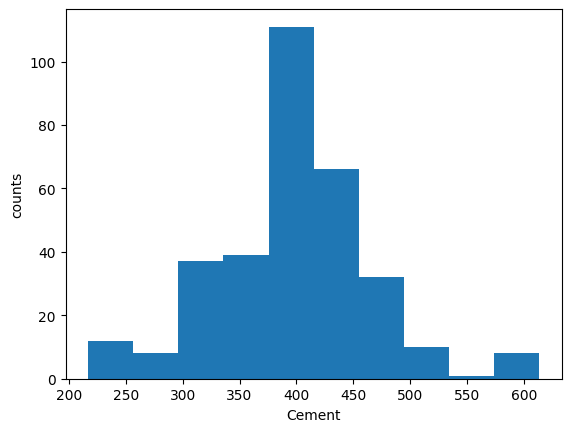

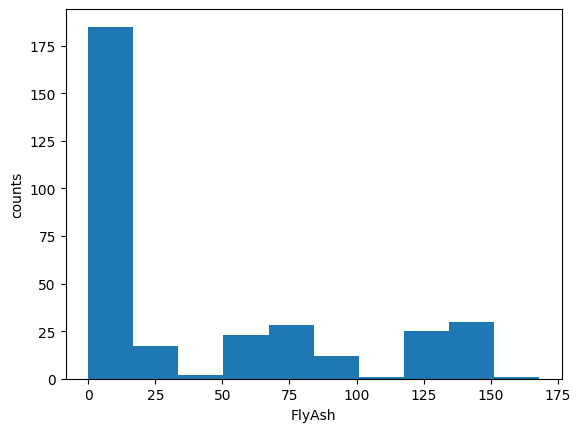

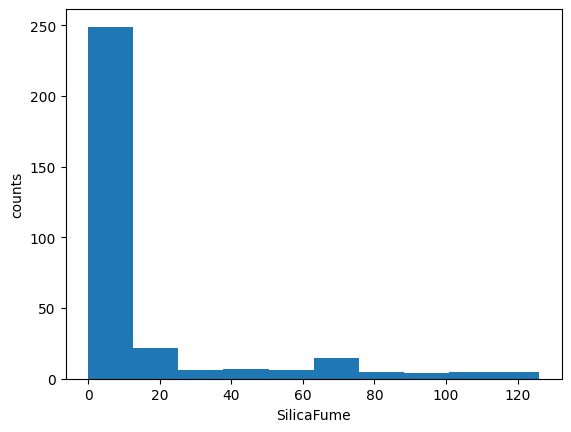

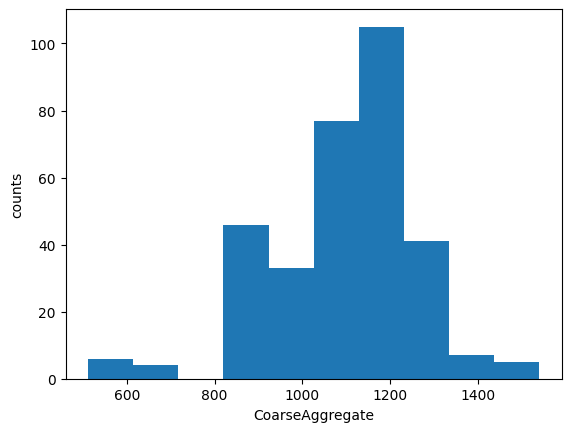

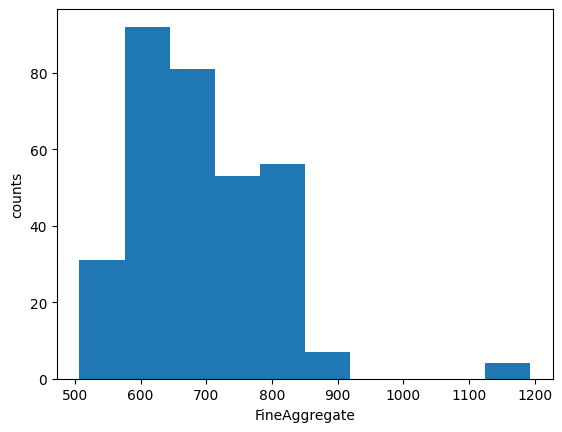

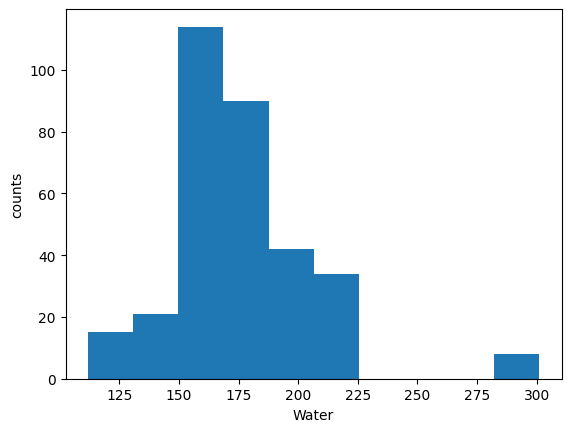

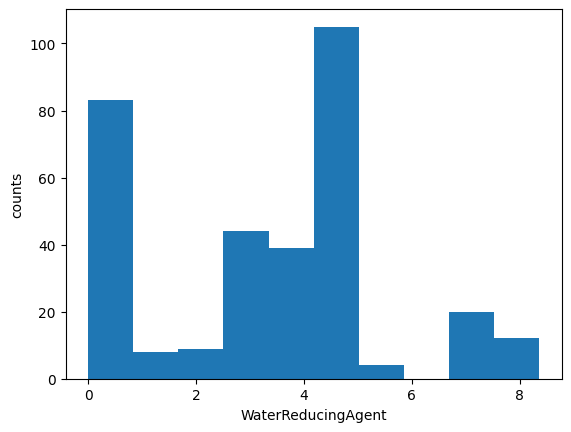

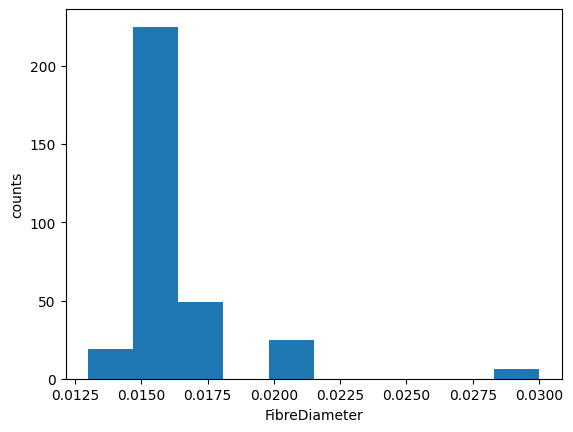

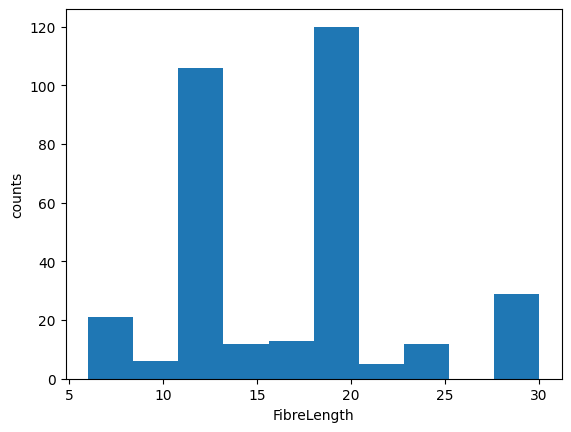

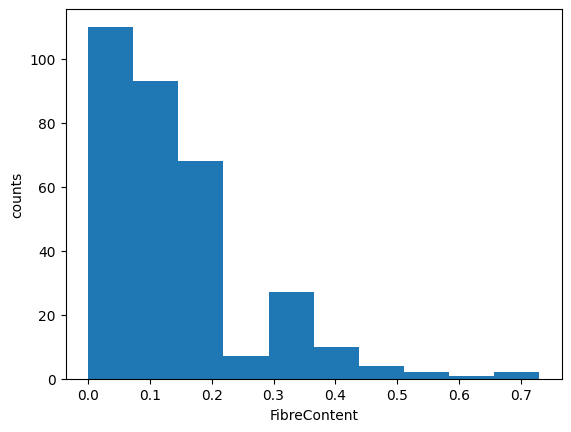

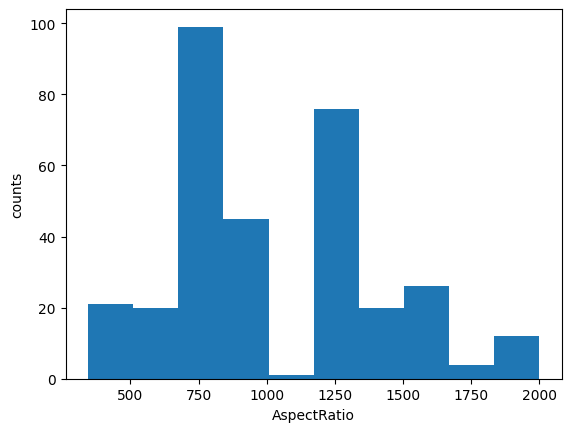

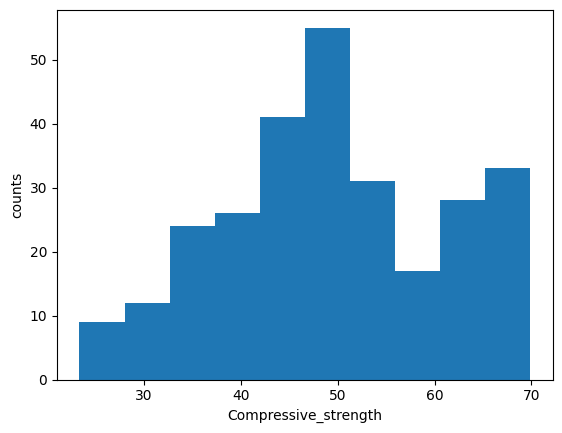

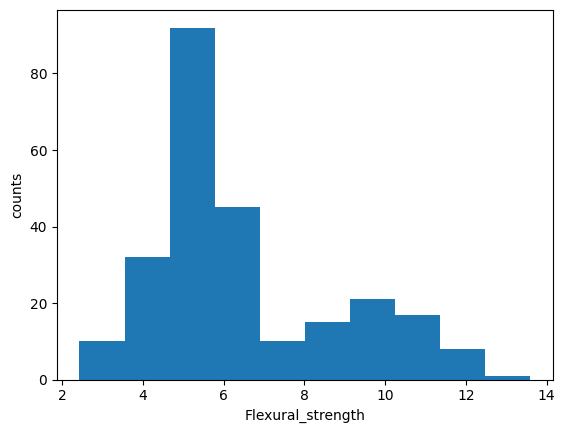

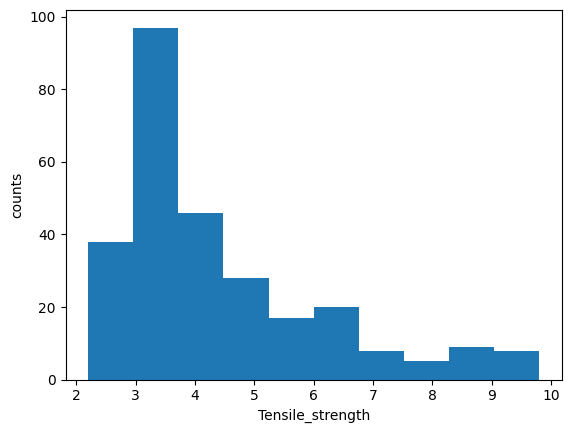

In [ ]:
#look at data distribution
for i in dataset.columns:
    plt.hist(dataset[i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

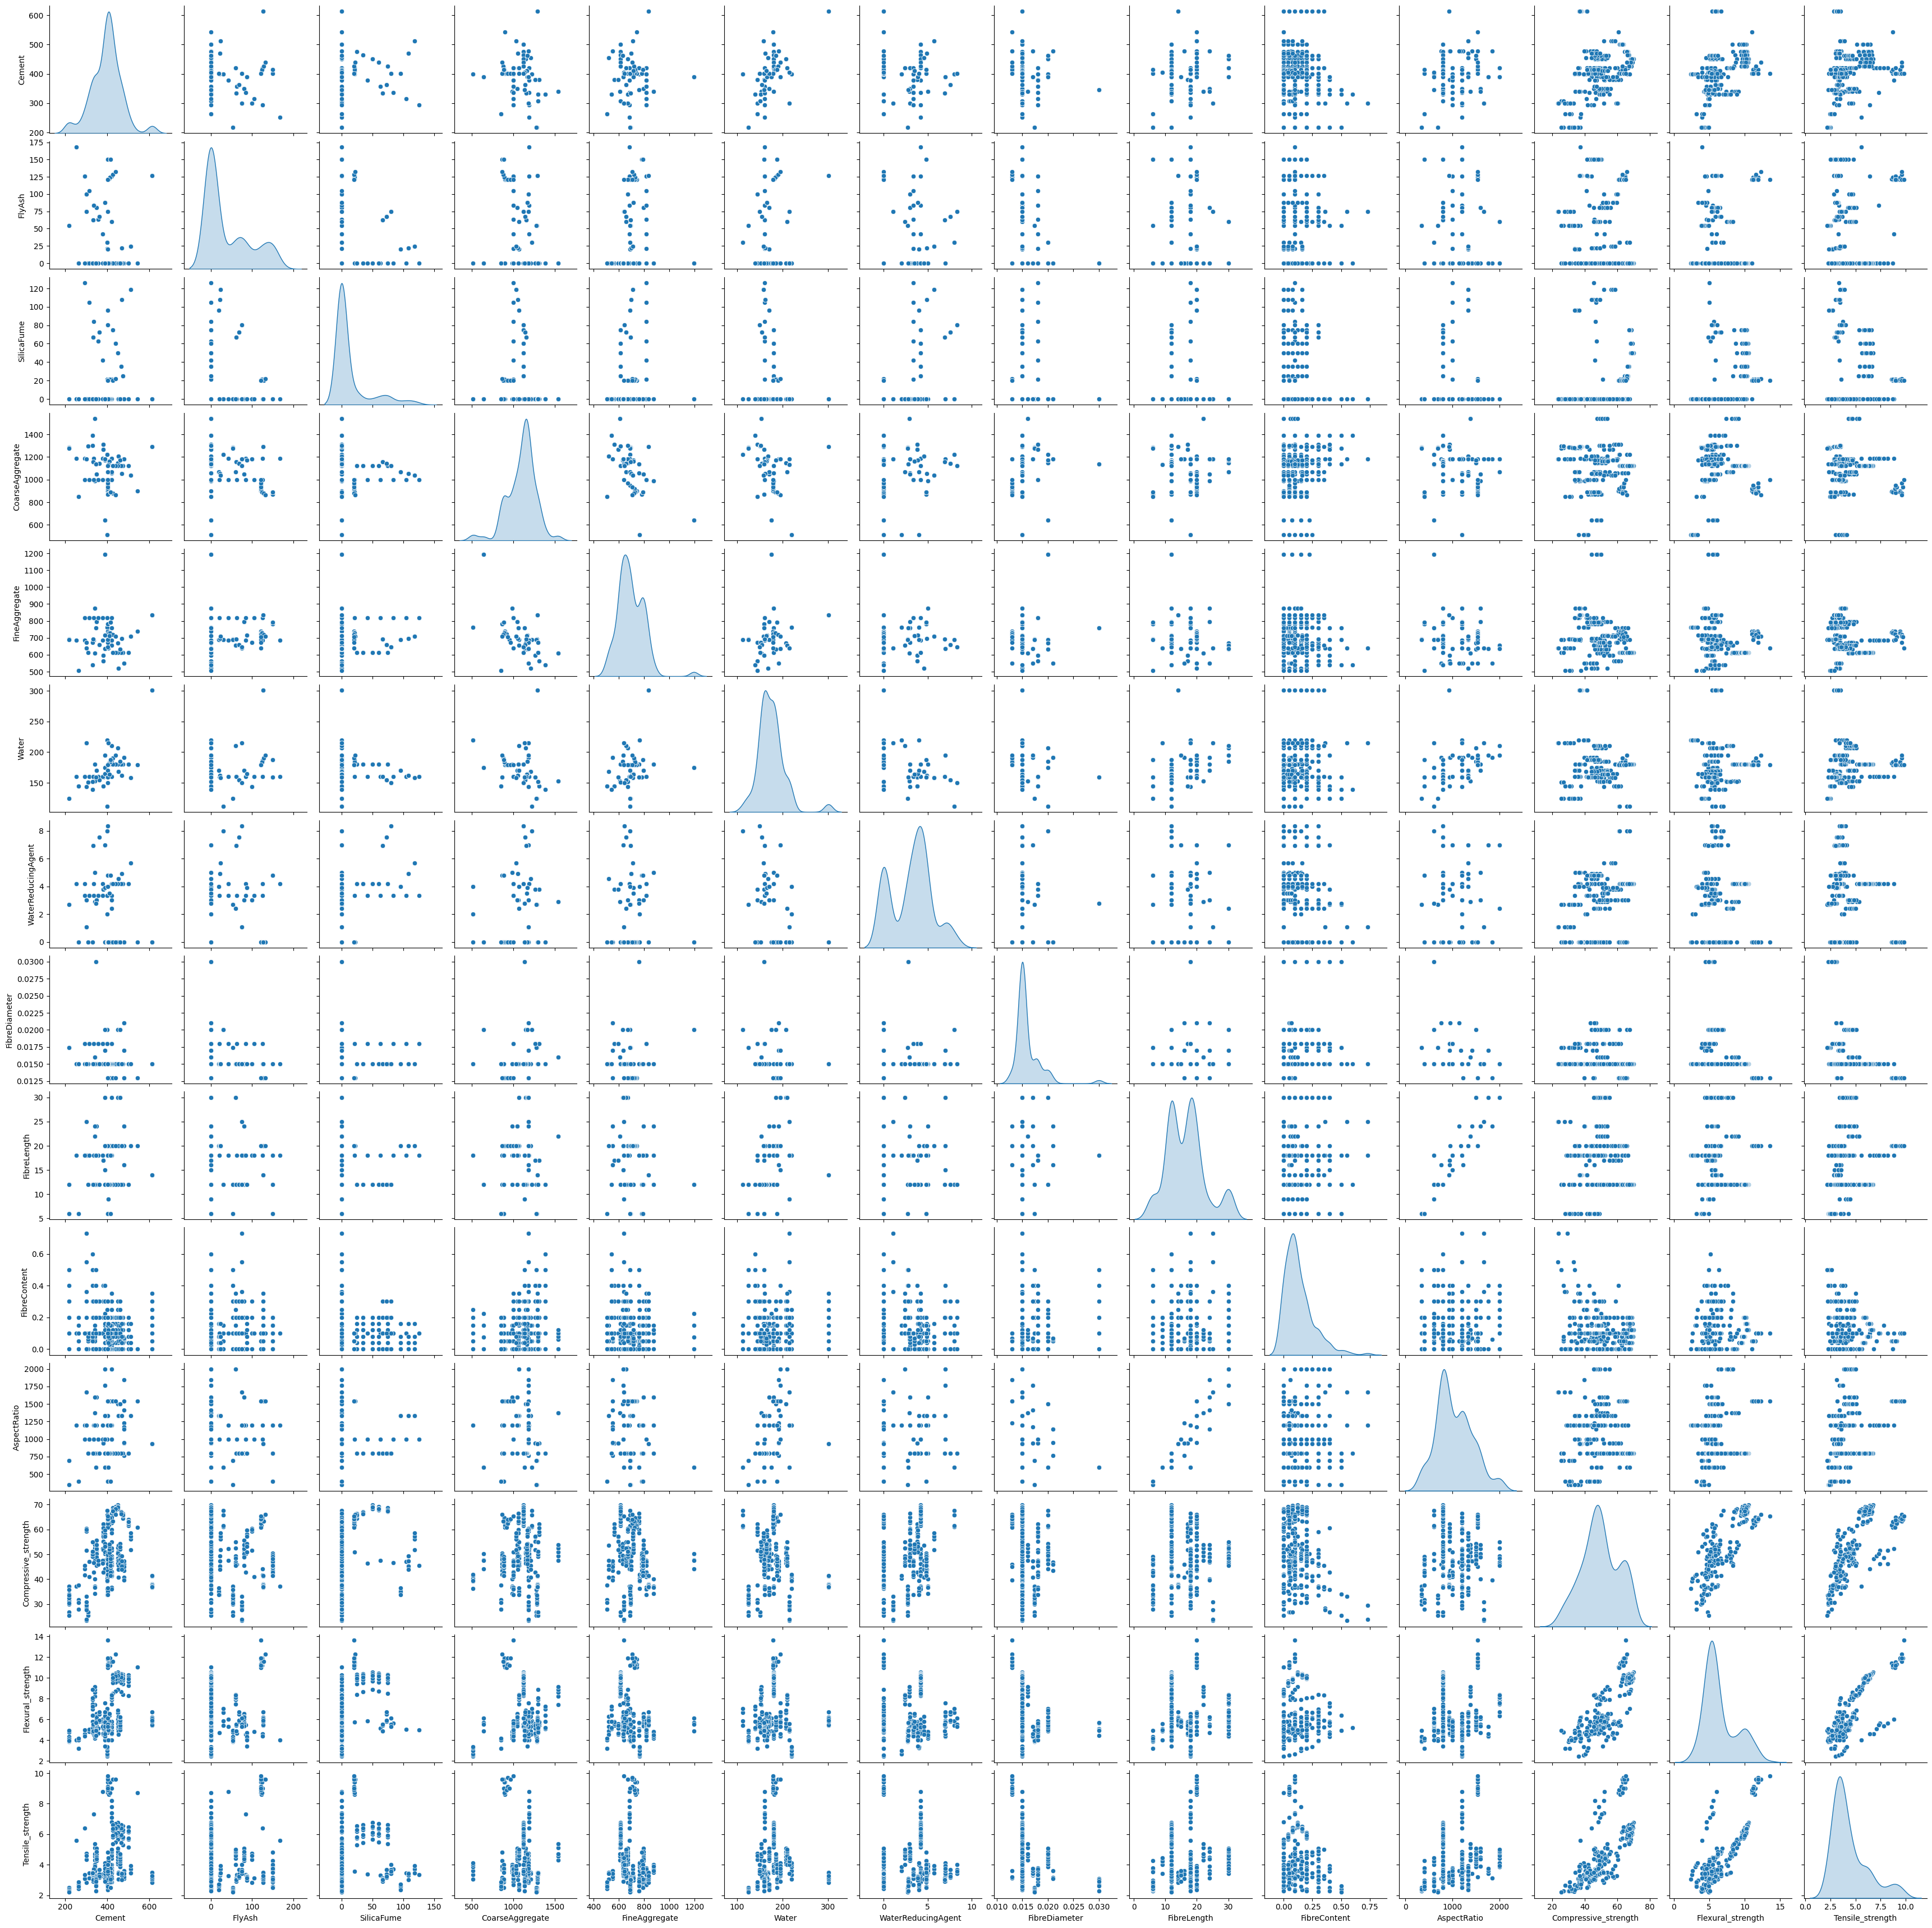

In [ ]:
sns.pairplot(dataset, diag_kind='kde')

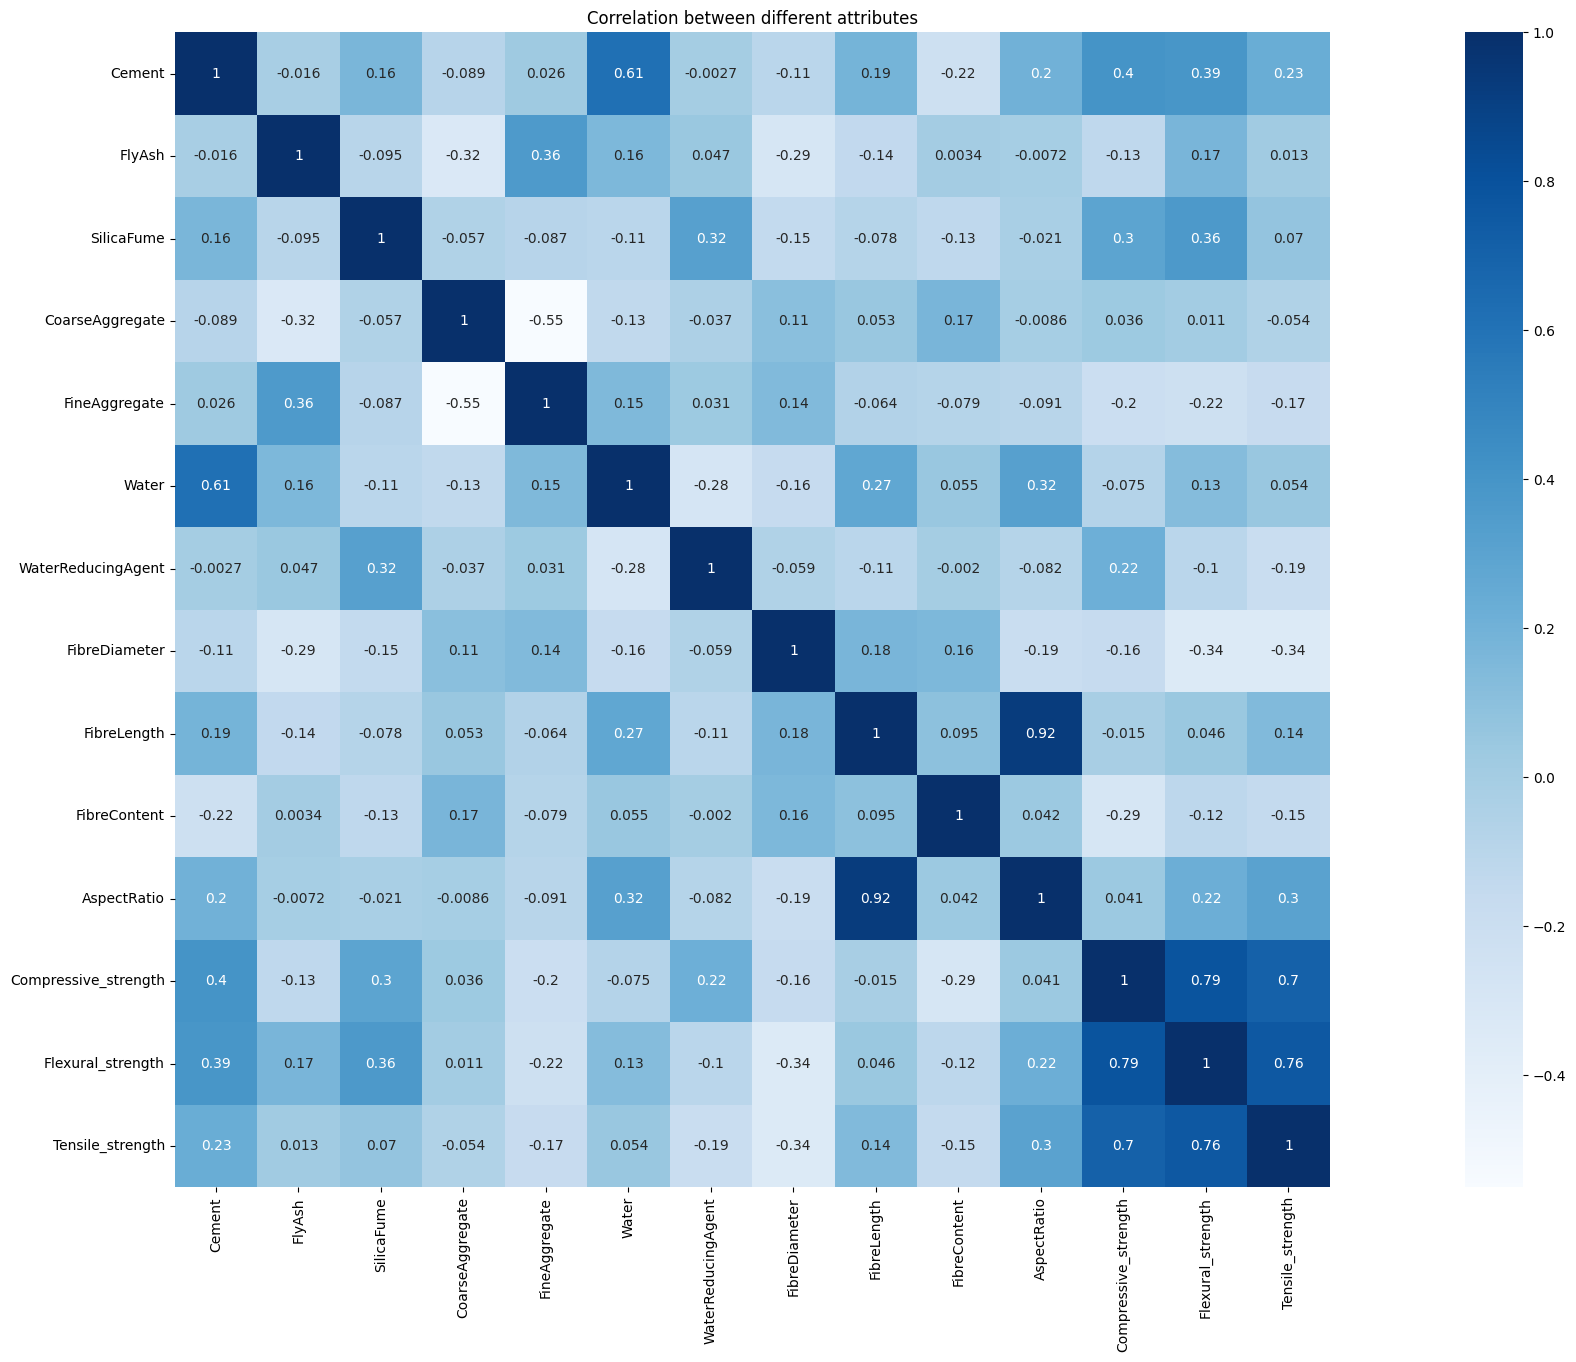

In [ ]:
plt.figure(figsize=(35,15))

sns.heatmap(dataset.corr(),vmax=1, square=True, annot=True, cmap='Blues')
plt.title('Correlation between different attributes')
plt.show()

<Axes: xlabel='Tensile_strength', ylabel='Density'>

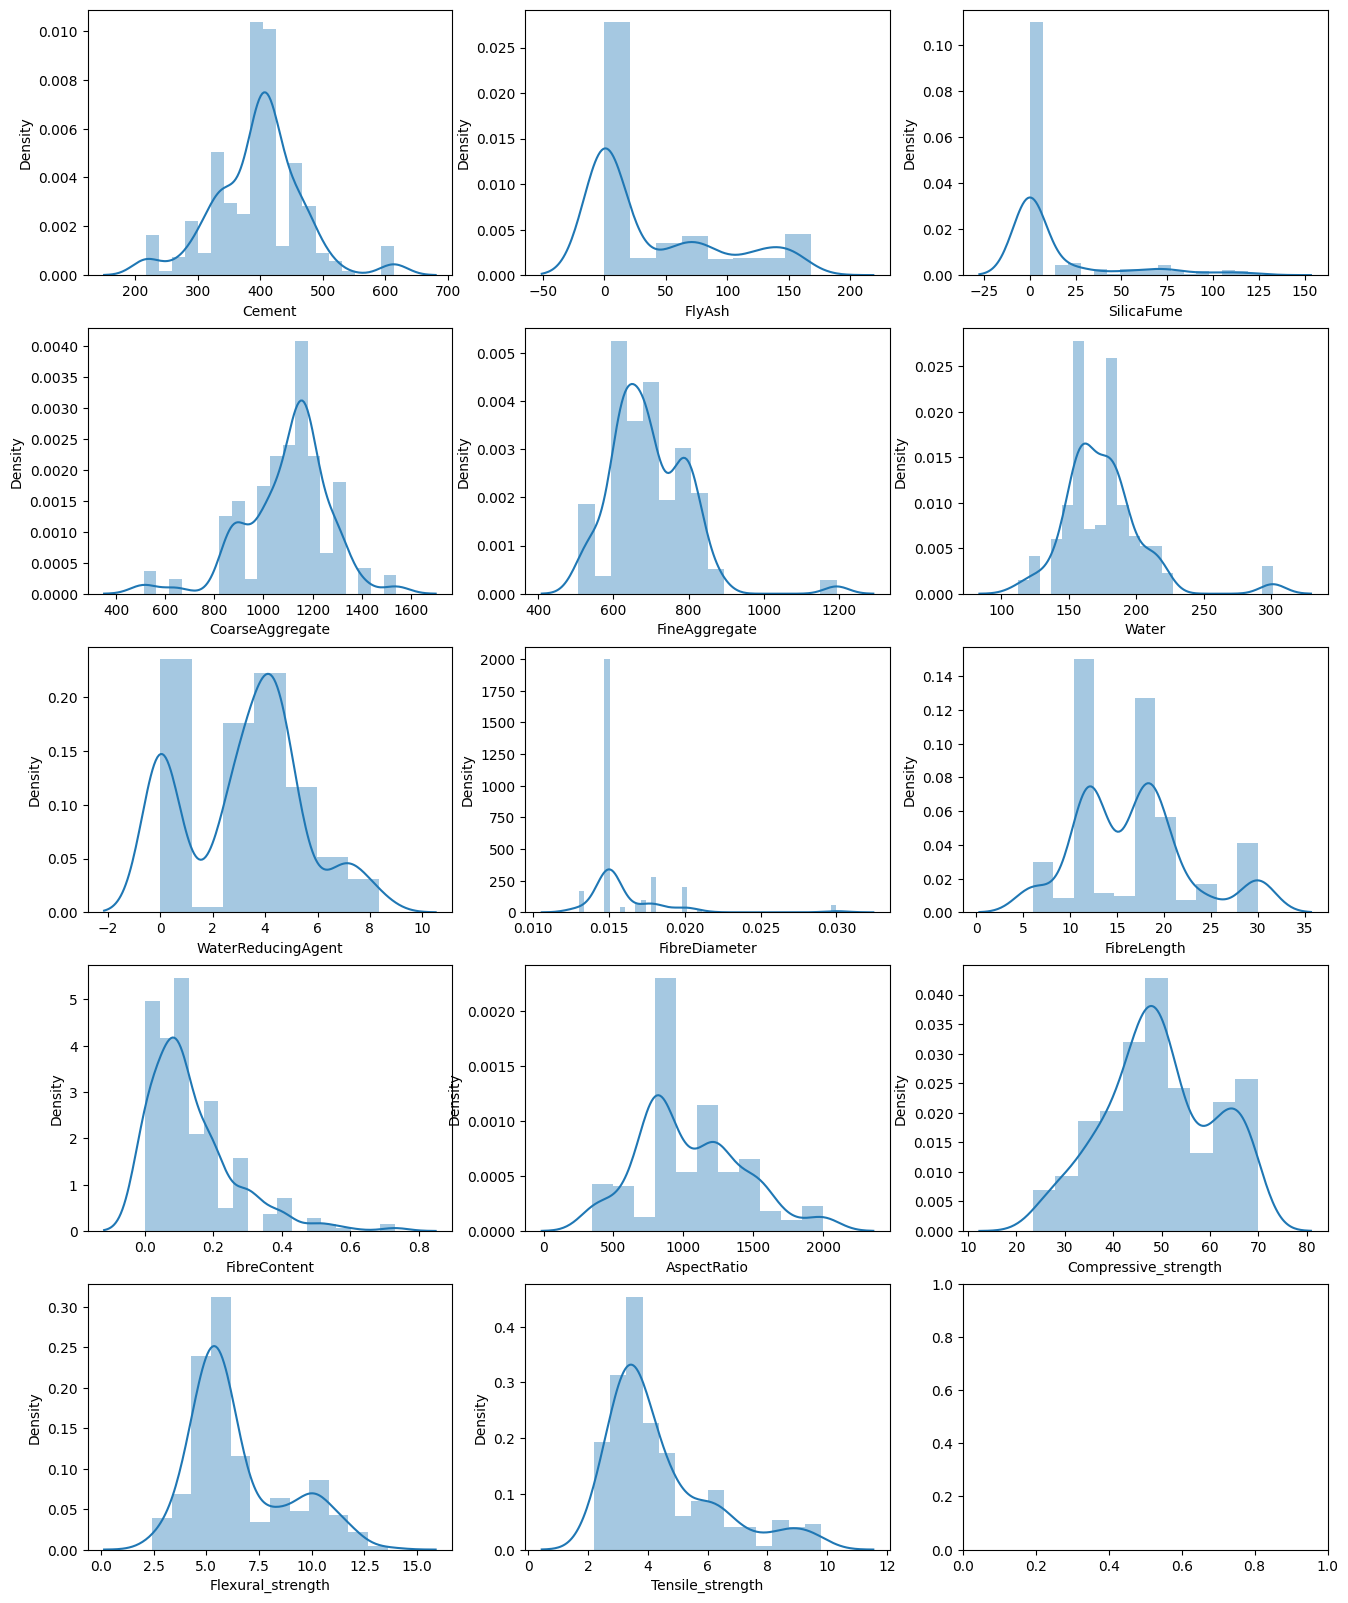

In [ ]:
#Displot

fig, ax2 = plt.subplots(5, 3, figsize=(16, 20))  # Adjust figsize if needed
sns.distplot(dataset['Cement'],ax=ax2[0][0])
sns.distplot(dataset['FlyAsh'],ax=ax2[0][1])
sns.distplot(dataset['SilicaFume'],ax=ax2[0][2])
sns.distplot(dataset['CoarseAggregate'],ax=ax2[1][0])
sns.distplot(dataset['FineAggregate'],ax=ax2[1][1])
sns.distplot(dataset['Water'],ax=ax2[1][2])
sns.distplot(dataset['WaterReducingAgent'],ax=ax2[2][0])
sns.distplot(dataset['FibreDiameter'],ax=ax2[2][1])
sns.distplot(dataset['FibreLength'],ax=ax2[2][2])
sns.distplot(dataset['FibreContent'],ax=ax2[3][0])
sns.distplot(dataset['AspectRatio'],ax=ax2[3][1])
sns.distplot(dataset['Compressive_strength'],ax=ax2[3][2])
sns.distplot(dataset['Flexural_strength'],ax=ax2[4][0])
sns.distplot(dataset['Tensile_strength'],ax=ax2[4][1])

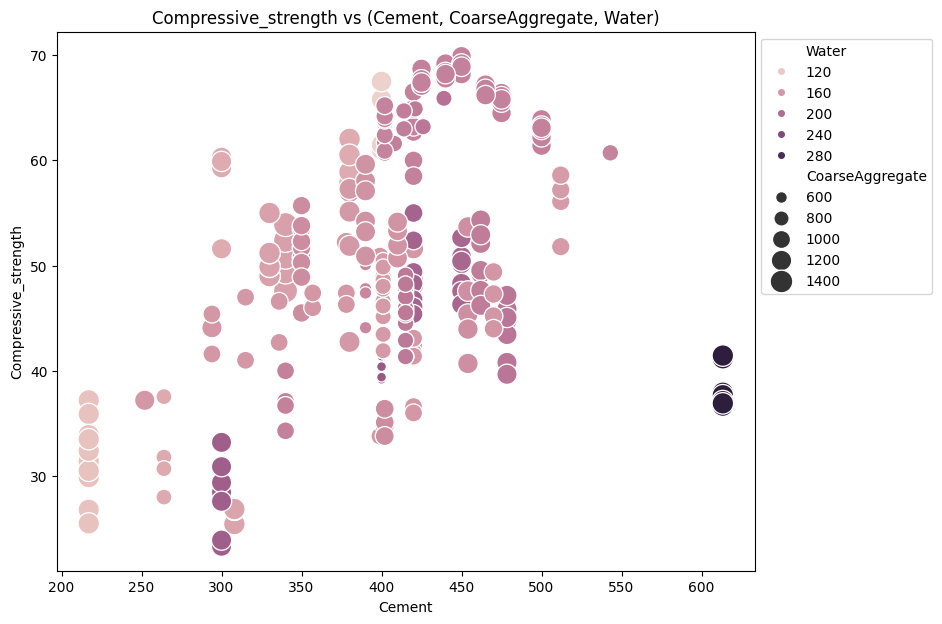

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
sns.scatterplot(y="Compressive_strength", x="Cement", hue="Water", size="CoarseAggregate", data=dataset, ax=ax, sizes=(50, 300))
ax.set_title("Compressive_strength vs (Cement, CoarseAggregate, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

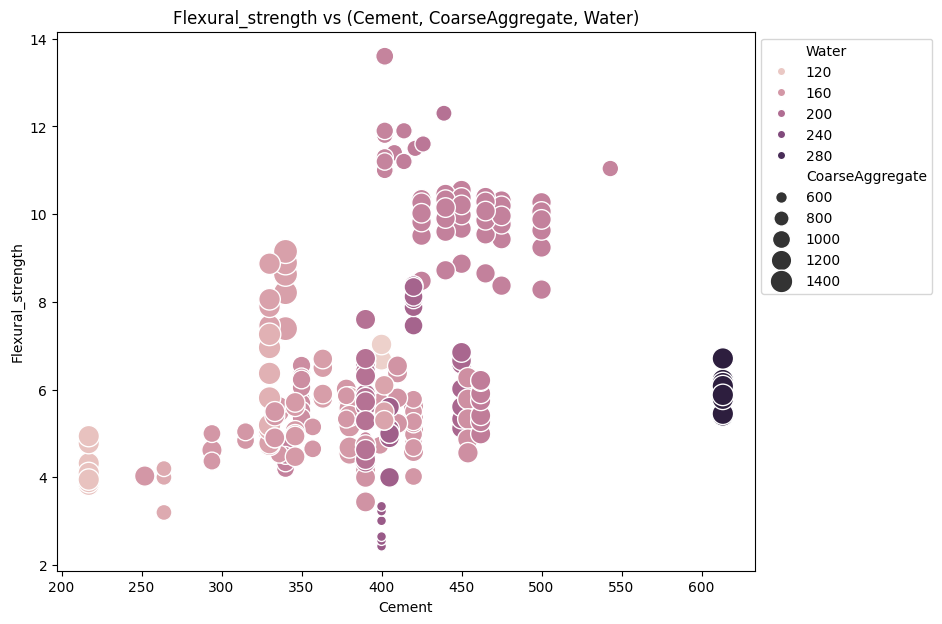

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
sns.scatterplot(y="Flexural_strength", x="Cement", hue="Water", size="CoarseAggregate", data=dataset, ax=ax, sizes=(50, 300))
ax.set_title("Flexural_strength vs (Cement, CoarseAggregate, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

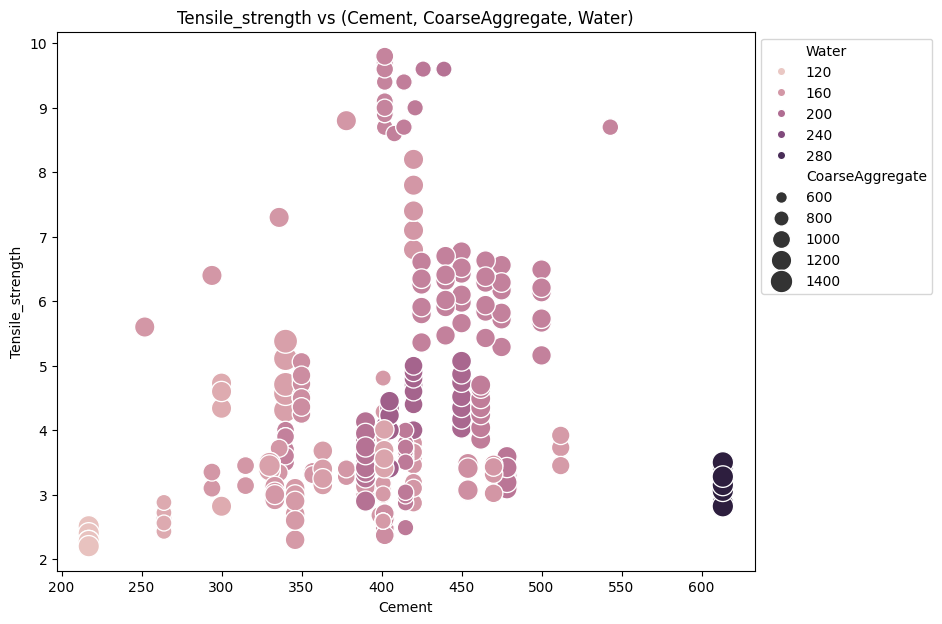

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
sns.scatterplot(y="Tensile_strength", x="Cement", hue="Water", size="CoarseAggregate", data=dataset, ax=ax, sizes=(50, 300))
ax.set_title("Tensile_strength vs (Cement, CoarseAggregate, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

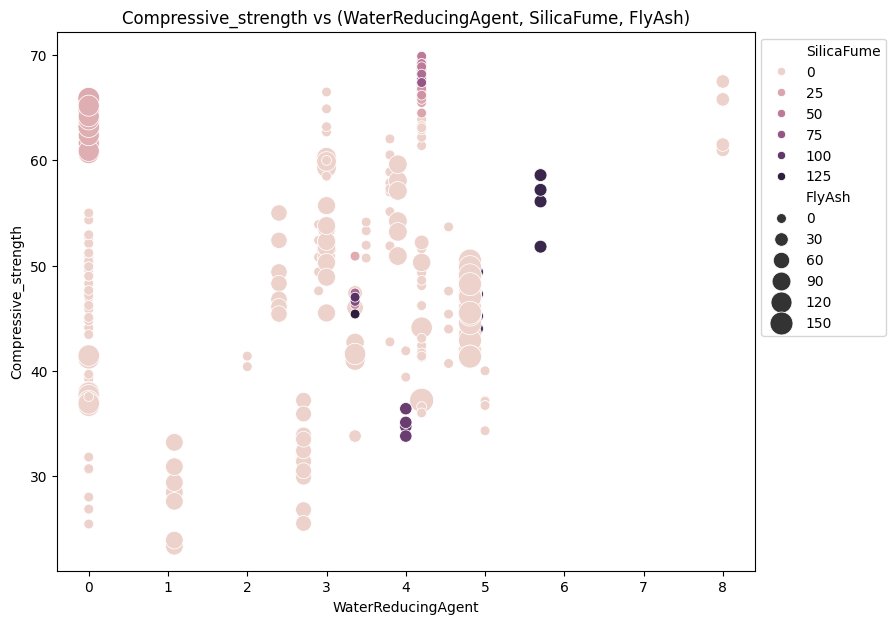

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
sns.scatterplot(y="Compressive_strength", x="WaterReducingAgent", hue="SilicaFume", size="FlyAsh", data=dataset, ax=ax, sizes=(50, 300))
ax.set_title("Compressive_strength vs (WaterReducingAgent, SilicaFume, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

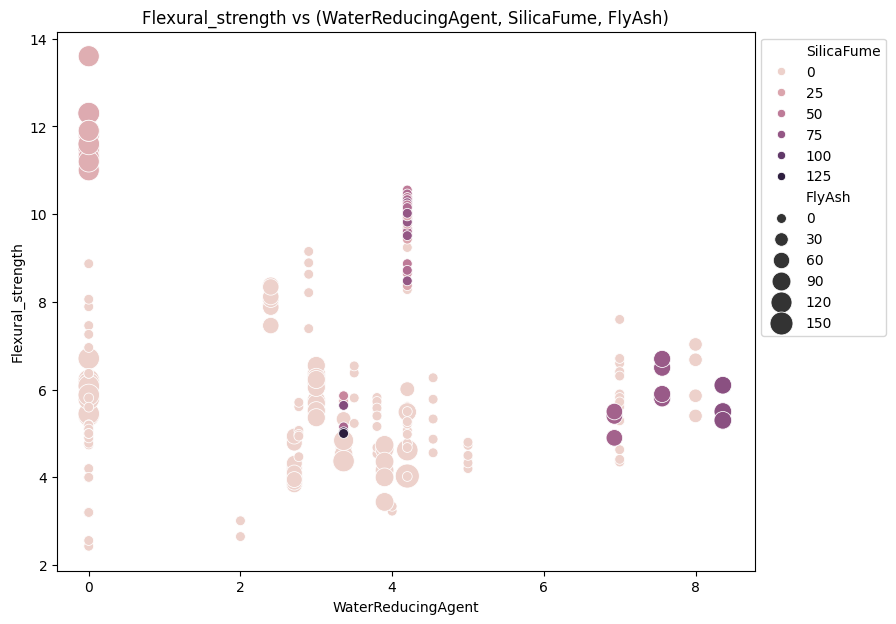

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
sns.scatterplot(y="Flexural_strength", x="WaterReducingAgent", hue="SilicaFume", size="FlyAsh", data=dataset, ax=ax, sizes=(50, 300))
ax.set_title("Flexural_strength vs (WaterReducingAgent, SilicaFume, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

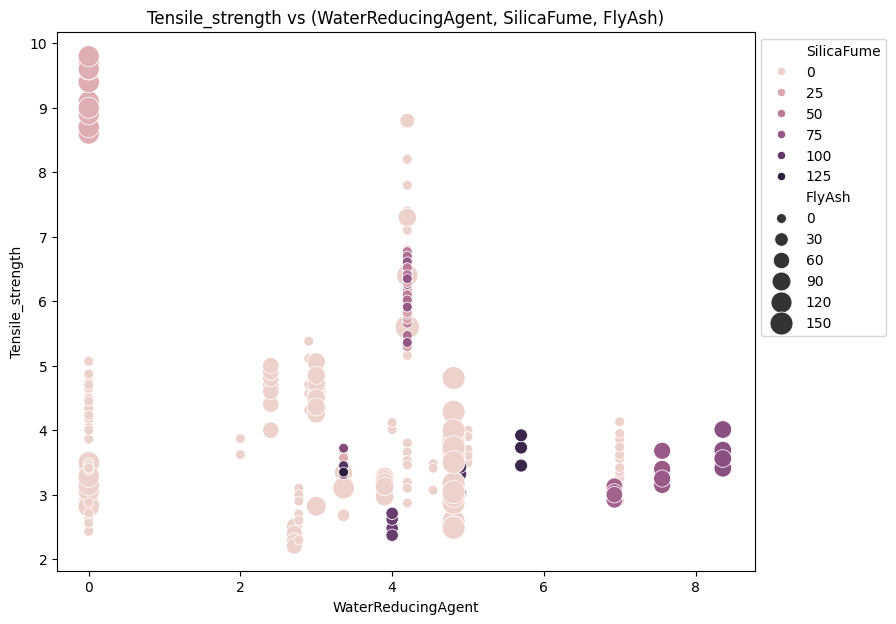

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
sns.scatterplot(y="Tensile_strength", x="WaterReducingAgent", hue="SilicaFume", size="FlyAsh", data=dataset, ax=ax, sizes=(50, 300))
ax.set_title("Tensile_strength vs (WaterReducingAgent, SilicaFume, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

# Data Preprocessing

In [6]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [7]:
# Apply the imputer to the dataset
imputed_data = imputer.fit_transform(dataset)

imputed_dataset = pd.DataFrame(imputed_data, columns=dataset.columns)

In [8]:
imputed_dataset.head()

Cement kg/mÂ³  Fly Ash kg/mÂ³  Silica Fume kg/mÂ³  Coarse Aggregate kg/mÂ³  \
0          400.0            30.0                 0.0                  1221.00   
1          400.0            30.0                 0.0                  1221.00   
2          400.0            30.0                 0.0                  1221.00   
3          400.0            30.0                 0.0                  1221.00   
4          390.0             0.0                 0.0                   642.25   

   Fine Aggregate kg/mÂ³  Water kg/mÂ³  Water-Reducing Agent kg/mÂ³  \
0                 688.00         112.0                          8.0   
1                 688.00         112.0                          8.0   
2                 688.00         112.0                          8.0   
3                 688.00         112.0                          8.0   
4                1193.66         175.0                          0.0   

   Fiber Diameter/mm  Fiber Length/mm  Fiber Content/%  Aspect Ratio  \
0               0.02             12.0             0.00         600.0   
1               0.02             12.0             0.05         600.0   
2               0.02             12.0             0.10         600.0   
3               0.02             12.0             0.15         600.0   
4               0.02             12.0             0.00         600.0   

   Compressive_strength  Flexural_strength  Tensile_strength  
0                  61.0               5.40             2.780  
1                  61.5               5.86             2.780  
2                  65.8               6.68             2.780  
3                  67.5               7.03             2.780  
4                  47.8               5.70             3.637

In [9]:
targets = [ 'Compressive_strength', 'Flexural_strength', 'Tensile_strength']

# Features are everything except the targets
X = imputed_dataset.drop(columns=targets)

# Initialize dictionaries to hold your training and testing sets
X_train_dict, X_test_dict, y_train_dict, y_test_dict = {}, {}, {}, {}

for target in targets:
    # Split the data into training and testing sets for each target
    X_train, X_test, y_train, y_test = train_test_split(X, imputed_dataset[target], test_size=0.2, random_state=42)

    # Store the splits in the respective dictionaries
    X_train_dict[target] = X_train
    X_test_dict[target] = X_test
    y_train_dict[target] = y_train
    y_test_dict[target] = y_test

# For Tensile_strength
X_train_tensile, X_test_tensile = X_train_dict['Tensile_strength'], X_test_dict['Tensile_strength']
y_train_tensile, y_test_tensile = y_train_dict['Tensile_strength'], y_test_dict['Tensile_strength']

# For Compressive_strength
X_train_compress, X_test_compress = X_train_dict['Compressive_strength'], X_test_dict['Compressive_strength']
y_train_compress, y_test_compress = y_train_dict['Compressive_strength'], y_test_dict['Compressive_strength']

# For Flexural_strength
X_train_flexural, X_test_flexural = X_train_dict['Flexural_strength'], X_test_dict['Flexural_strength']
y_train_flexural, y_test_flexural = y_train_dict['Flexural_strength'], y_test_dict['Flexural_strength']


## Feature Engineering

In [10]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Dictionaries to hold scaled training and testing sets
X_train_scaled_dict, X_test_scaled_dict = {}, {}

for target in targets:
    # Fit the scaler on the training data for the current target
    scaler.fit(X_train_dict[target])

    # Transform the training data and store in the scaled dictionary
    X_train_scaled_dict[target] = pd.DataFrame(scaler.transform(X_train_dict[target]),
                                               columns=X_train_dict[target].columns,
                                               index=X_train_dict[target].index)

    # Transform the testing data and store in the scaled dictionary
    X_test_scaled_dict[target] = pd.DataFrame(scaler.transform(X_test_dict[target]),
                                              columns=X_test_dict[target].columns,
                                              index=X_test_dict[target].index)

# For example, to access the scaled training and testing sets for Tensile_strength:
X_train_tensile_scaled = X_train_scaled_dict['Tensile_strength']
X_test_tensile_scaled = X_test_scaled_dict['Tensile_strength']

# And similarly for Compressive_strength and Flexural_strength:
X_train_compress_scaled = X_train_scaled_dict['Compressive_strength']
X_test_compress_scaled = X_test_scaled_dict['Compressive_strength']

X_train_flexural_scaled = X_train_scaled_dict['Flexural_strength']
X_test_flexural_scaled = X_test_scaled_dict['Flexural_strength']


In [ ]:
X_test_flexural_scaled.head()

Cement    FlyAsh  SilicaFume  CoarseAggregate  FineAggregate     Water  \
132 -1.415943 -0.770874    3.708669        -0.621497       1.289463 -0.479537   
108  1.136554 -0.770874   -0.500923         0.479547      -1.504576  0.531918   
137  1.435545 -0.770874   -0.500923         0.141365      -0.839726  0.173014   
9    0.743436 -0.770874   -0.500923         0.291535      -0.244806  1.053960   
180  0.909543 -0.770874   -0.500923         0.423684      -0.651857  0.336152   

     WaterReducingAgent  FibreDiameter  FibreLength  FibreContent  AspectRatio  
132            0.071586       0.829593     0.286041     -0.223772    -0.105344  
108           -1.436444      -1.127279     1.303223     -0.532876     2.123252  
137            0.448593      -0.344530    -0.731140      0.239884    -0.632103  
9             -1.436444       1.612341     2.320405     -0.610152     1.211553  
180           -1.436444       1.612341     2.320405      1.321747     1.211553

# Hyperparameter Tuning

## XGBoost Model Tuning

In [ ]:
%pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
# Define the parameter distribution
param_dist_xg = {
    'n_estimators': randint(1, 1000),
    'max_depth': randint(1, 25),
    'learning_rate': uniform(0.01, 2.0),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
}

In [ ]:
# Initialize the XGBRegressor
xgb_model_compressive = XGBRegressor(objective='reg:squarederror')

# Initialize RandomizedSearchCV with MAE as the primary metric
rnd_search_xg_comp = RandomizedSearchCV(
    estimator=xgb_model_compressive,
    param_distributions=param_dist_xg,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data
rnd_search_xg_comp.fit(X_train_compress_scaled, y_train_compress)

best_params_xg_compressive = rnd_search_xg_comp.best_params_
best_score_xg_compressive = -rnd_search_xg_comp.best_score_

# Print out the performance metrics, including MAE as the primary metric
print(f"Best Parameters: {best_params_xg_compressive}")
print(f"Best MAE (Primary Metric): {best_score_xg_compressive}")  # Negated to make it positive

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'colsample_bytree': 0.9920991510265951, 'learning_rate': 0.5778419494749314, 'max_depth': 14, 'n_estimators': 338, 'subsample': 0.845684126075868}
Best MAE (Primary Metric): 2.040086593156127


In [ ]:
xgb_model_flexural = XGBRegressor(objective='reg:squarederror')

rnd_search_xg_flex = RandomizedSearchCV(
    estimator=xgb_model_flexural,
    param_distributions=param_dist_xg,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rnd_search_xg_flex.fit(X_train_flexural_scaled, y_train_flexural)

best_params_xg_flexural = rnd_search_xg_flex.best_params_
best_score_xg_flexural = -rnd_search_xg_flex.best_score_  # Negated to make it positive (since scoring was negative MAE)

print(f"Best Parameters: {best_params_xg_flexural}")
print(f"Best Score (from tuning): {best_score_xg_flexural}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'colsample_bytree': 0.8167605036202489, 'learning_rate': 0.03167530296059672, 'max_depth': 9, 'n_estimators': 915, 'subsample': 0.72738600303584}
Best Score (from tuning): 0.3643871841751432


In [ ]:
# Initialize the XGBRegressor
xgb_model_tensile = XGBRegressor(objective='reg:squarederror')

# Initialize RandomizedSearchCV with MAE as the primary metric
rnd_search_xg_tens = RandomizedSearchCV(
    estimator=xgb_model_tensile,
    param_distributions=param_dist_xg,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data
rnd_search_xg_tens.fit(X_train_tensile_scaled, y_train_tensile)

best_params_xg_tensile = rnd_search_xg_tens.best_params_
best_score_xg_tensile = -rnd_search_xg_tens.best_score_

# Print out the performance metrics, including MAE as the primary metric
print(f"Best Parameters: {best_params_xg_tensile}")
print(f"Best MAE (Primary Metric): {best_score_xg_tensile}")  # Negated to make it positive

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'colsample_bytree': 0.8167605036202489, 'learning_rate': 0.03167530296059672, 'max_depth': 9, 'n_estimators': 915, 'subsample': 0.72738600303584}
Best MAE (Primary Metric): 0.20786274673927957


## CatBoost Model Tuning

In [11]:
%pip install catboost
from catboost import CatBoostRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.5 MB/s eta 0:00:00


In [ ]:
# Define the parameter distribution for CatBoost
param_dist_cb = {
    'depth': randint(4, 10),  # Depth of the tree
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'iterations': randint(100, 1000),  # Number of trees
    'l2_leaf_reg': uniform(1, 10),  # L2 regularization term on weights
    'border_count': randint(1, 255),  # Number of splits for numerical features
    'bagging_temperature': uniform(0.0, 1.0)  # Bagging temperature for Bayesian bootstrap
}

In [ ]:
# Initialize the CatBoost Regressor
cb_model_compressive = CatBoostRegressor(loss_function='MAE', silent=True)

# Initialize RandomizedSearchCV with MAE as the primary metric for compressive strength
rnd_search_cb_compress = RandomizedSearchCV(
    estimator=cb_model_compressive,
    param_distributions=param_dist_cb,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data for compressive strength
rnd_search_cb_compress.fit(X_train_compress_scaled, y_train_compress)

# Retrieve the best parameters and best score
best_params_cb_compress = rnd_search_cb_compress.best_params_
best_score_cb_compress = -rnd_search_cb_compress.best_score_  # Negated to make it positive

# Print the best parameters and the best MAE score
print(f"Compressive Strength - Best Parameters: {best_params_cb_compress}")
print(f"Compressive Strength - Best MAE Score: {best_score_cb_compress}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Compressive Strength - Best Parameters: {'bagging_temperature': 0.8009492946823997, 'border_count': 140, 'depth': 5, 'iterations': 774, 'l2_leaf_reg': 7.432882184423532, 'learning_rate': 0.147475867147455}
Compressive Strength - Best MAE Score: 2.2139067369931262


In [ ]:
cb_model_flexural = CatBoostRegressor(loss_function='MAE', silent=True)

rnd_search_cb_flexural = RandomizedSearchCV(
    estimator=cb_model_flexural,
    param_distributions=param_dist_cb,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rnd_search_cb_flexural.fit(X_train_flexural_scaled, y_train_flexural)

best_params_cb_flexural = rnd_search_cb_flexural.best_params_
best_score_cb_flexural = -rnd_search_cb_flexural.best_score_  # Negated to make it positive

print(f"Flexural Strength - Best Parameters: {best_params_cb_flexural}")
print(f"Flexural Strength - Best MAE Score: {best_score_cb_flexural}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Flexural Strength - Best Parameters: {'bagging_temperature': 0.4393365018657701, 'border_count': 179, 'depth': 4, 'iterations': 663, 'l2_leaf_reg': 6.6327557197638365, 'learning_rate': 0.21865482592783825}
Flexural Strength - Best MAE Score: 0.3920747907491111


In [ ]:
cb_model_tensile = CatBoostRegressor(loss_function='MAE', silent=True)

rnd_search_cb_tensile = RandomizedSearchCV(
    estimator=cb_model_tensile,
    param_distributions=param_dist_cb,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rnd_search_cb_tensile.fit(X_train_tensile_scaled, y_train_tensile)

best_params_cb_tensile = rnd_search_cb_tensile.best_params_
best_score_cb_tensile = -rnd_search_cb_tensile.best_score_  # Negated to make it positive

print(f"Tensile Strength - Best Parameters: {best_params_cb_tensile}")
print(f"Tensile Strength - Best MAE Score: {best_score_cb_tensile}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tensile Strength - Best Parameters: {'bagging_temperature': 0.3486659872917294, 'border_count': 199, 'depth': 7, 'iterations': 588, 'l2_leaf_reg': 7.90937738102466, 'learning_rate': 0.12602060389016123}
Tensile Strength - Best MAE Score: 0.2197390998853445


## Random Forest Model Tuning

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define the parameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_depth': randint(1, 25),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
}

In [ ]:
# Initialize the Random Forest Regressor
rf_model_compress = RandomForestRegressor()

# Initialize RandomizedSearchCV with MAE as the primary metric for compressive strength
rnd_search_rf_compress = RandomizedSearchCV(
    estimator=rf_model_compress,
    param_distributions=param_dist_rf,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data for compressive strength
rnd_search_rf_compress.fit(X_train_compress_scaled, y_train_compress)

# Retrieve the best parameters and best score
best_params_rf_compress = rnd_search_rf_compress.best_params_
best_score_rf_compress = -rnd_search_rf_compress.best_score_  # Negated to make it positive

# Print the best parameters and the best MAE score
print("Compressive Strength - Random Forest Model")
print(f"Best Parameters: {best_params_rf_compress}")
print(f"Best MAE Score: {best_score_rf_compress}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Compressive Strength - Random Forest Model
Best Parameters: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 227}
Best MAE Score: 2.4223385139238838


In [ ]:
# Initialize the Random Forest Regressor
rf_model_flexural = RandomForestRegressor()

# Initialize RandomizedSearchCV with MAE as the primary metric for flexural strength
rnd_search_rf_flexural = RandomizedSearchCV(
    estimator=rf_model_flexural,
    param_distributions=param_dist_rf,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data for flexural strength
rnd_search_rf_flexural.fit(X_train_flexural_scaled, y_train_flexural)

# Retrieve the best parameters and best score
best_params_rf_flexural = rnd_search_rf_flexural.best_params_
best_score_rf_flexural = -rnd_search_rf_flexural.best_score_  # Negated to make it positive

# Print the best parameters and the best MAE score
print("\nFlexural Strength - Random Forest Model")
print(f"Best Parameters: {best_params_rf_flexural}")
print(f"Best MAE Score: {best_score_rf_flexural}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Flexural Strength - Random Forest Model
Best Parameters: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 227}
Best MAE Score: 0.3907150759251149


In [ ]:
# Initialize the Random Forest Regressor
rf_model_tensile = RandomForestRegressor()

# Initialize RandomizedSearchCV with MAE as the primary metric for flexural strength
rnd_search_rf_tensile = RandomizedSearchCV(
    estimator=rf_model_tensile,
    param_distributions=param_dist_rf,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data for flexural strength
rnd_search_rf_tensile.fit(X_train_tensile_scaled, y_train_tensile)

# Retrieve the best parameters and best score
best_params_rf_tensile = rnd_search_rf_tensile.best_params_
best_score_rf_tensile = -rnd_search_rf_tensile.best_score_  # Negated to make it positive

# Print the best parameters and the best MAE score
print("\nTensile Strength - Random Forest Model")
print(f"Best Parameters: {best_params_rf_tensile}")
print(f"Best MAE Score: {best_score_rf_tensile}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Tensile Strength - Random Forest Model
Best Parameters: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 227}
Best MAE Score: 0.27372311200974586


## SVM Model Tuning

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Define the parameter distribution for SVR
param_dist_svr = {
    'C': loguniform(1e-3, 1e3),  # Regularization parameter
    'gamma': ['scale', 'auto'] + list(loguniform(1e-4, 1e-1).rvs(size=10)),  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'epsilon': loguniform(1e-4, 1e-1),  # Epsilon in the epsilon-SVR model
}

In [ ]:
# Initialize the SVR
svr_model_compressive = SVR(kernel='rbf')

# Initialize RandomizedSearchCV with MAE as the primary metric for compressive strength
rnd_search_svr_compress = RandomizedSearchCV(
    estimator=svr_model_compressive,
    param_distributions=param_dist_svr,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data for compressive strength
rnd_search_svr_compress.fit(X_train_compress_scaled, y_train_compress)

# Retrieve the best parameters and best score
best_params_svr_compress = rnd_search_svr_compress.best_params_
best_score_svr_compress = -rnd_search_svr_compress.best_score_  # Negated to make it positive

# Print the best parameters and the best MAE score
print("Compressive Strength - SVM Model")
print(f"Best Parameters: {best_params_svr_compress}")
print(f"Best MAE Score: {best_score_svr_compress}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Compressive Strength - SVM Model
Best Parameters: {'C': 695.8780103230359, 'epsilon': 0.0004992453416923984, 'gamma': 0.08829151899220372}
Best MAE Score: 2.4295870721750514


In [ ]:
# Initialize the SVR
svr_model_flexural = SVR(kernel='rbf')

# Initialize RandomizedSearchCV with MAE as the primary metric for flexural strength
rnd_search_svr_flexural = RandomizedSearchCV(
    estimator=svr_model_flexural,
    param_distributions=param_dist_svr,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data for flexural strength
rnd_search_svr_flexural.fit(X_train_flexural_scaled, y_train_flexural)

# Retrieve the best parameters and best score
best_params_svr_flexural = rnd_search_svr_flexural.best_params_
best_score_svr_flexural = -rnd_search_svr_flexural.best_score_  # Negated to make it positive

# Print the best parameters and the best MAE score
print("\nFlexural Strength - SVM Model")
print(f"Best Parameters: {best_params_svr_flexural}")
print(f"Best MAE Score: {best_score_svr_flexural}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Flexural Strength - SVM Model
Best Parameters: {'C': 16.523945479957096, 'epsilon': 0.0012327891605450798, 'gamma': 'scale'}
Best MAE Score: 0.39779255936785485


In [ ]:
# Initialize the SVR
svr_model_tensile = SVR(kernel='rbf')

# Initialize RandomizedSearchCV with MAE as the primary metric for tensile strength
rnd_search_svr_tensile = RandomizedSearchCV(
    estimator=svr_model_tensile,
    param_distributions=param_dist_svr,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data for flexural strength
rnd_search_svr_tensile.fit(X_train_tensile_scaled, y_train_tensile)

# Retrieve the best parameters and best score
best_params_svr_tensile = rnd_search_svr_tensile.best_params_
best_score_svr_tensile = -rnd_search_svr_tensile.best_score_  # Negated to make it positive

# Print the best parameters and the best MAE score
print("\nTensile Strength - SVM Model")
print(f"Best Parameters: {best_params_svr_tensile}")
print(f"Best MAE Score: {best_score_svr_tensile}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Tensile Strength - SVM Model
Best Parameters: {'C': 51.52807362513967, 'epsilon': 0.01016166244341328, 'gamma': 0.08829151899220372}
Best MAE Score: 0.28102731402845366


## LightGBM Model Tuning

In [18]:
import lightgbm as lgb

In [ ]:
# Define the parameter distribution for LightGBM
param_dist_lgb = {
    'num_leaves': randint(20, 150),  # Number of leaves in one tree
    'learning_rate': uniform(0.01, 0.2),  # Learning rate
    'n_estimators': randint(100, 1000),  # Number of boosting iterations
    'max_depth': randint(-1, 20),  # Maximum tree depth for base learners
    'min_child_weight': uniform(0.001, 0.1),  # Minimum sum of instance weight needed in a child
    'colsample_bytree': uniform(0.6, 0.4),  # Subsample ratio of columns when constructing each tree
    'subsample': uniform(0.6, 0.4),  # Subsample ratio of the training instances
    'reg_alpha': uniform(0.0, 1.0),  # L1 regularization term on weights
    'reg_lambda': uniform(0.0, 1.0)  # L2 regularization term on weights
}

In [ ]:
# Initialize the LightGBM Regressor
lgb_model_compress = lgb.LGBMRegressor()

# Initialize RandomizedSearchCV with MAE as the primary metric for compressive strength
rnd_search_lgb_compress = RandomizedSearchCV(
    estimator=lgb_model_compress,
    param_distributions=param_dist_lgb,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data for compressive strength
rnd_search_lgb_compress.fit(X_train_compress_scaled, y_train_compress)

# Retrieve the best parameters and best score
best_params_lgb_compress = rnd_search_lgb_compress.best_params_
best_score_lgb_compress = -rnd_search_lgb_compress.best_score_  # Negated to make it positive

# Print the best parameters and the best MAE score
print("Compressive Strength - LightGBM Model")
print(f"Best Parameters: {best_params_lgb_compress}")
print(f"Best MAE Score: {best_score_lgb_compress}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 259, number of used features: 11
[LightGBM] [Info] Start training from score 49.980378
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [ ]:
# Initialize the LightGBM Regressor
lgb_model_flexural = lgb.LGBMRegressor()

# Initialize RandomizedSearchCV with MAE as the primary metric for flexural strength
rnd_search_lgb_flexural = RandomizedSearchCV(
    estimator=lgb_model_flexural,
    param_distributions=param_dist_lgb,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data for flexural strength
rnd_search_lgb_flexural.fit(X_train_flexural_scaled, y_train_flexural)

# Retrieve the best parameters and best score
best_params_lgb_flexural = rnd_search_lgb_flexural.best_params_
best_score_lgb_flexural = -rnd_search_lgb_flexural.best_score_  # Negated to make it positive

# Print the best parameters and the best MAE score
print("\nFlexural Strength - LightGBM Model")
print(f"Best Parameters: {best_params_lgb_flexural}")
print(f"Best MAE Score: {best_score_lgb_flexural}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 259, number of used features: 11
[LightGBM] [Info] Start training from score 6.335637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

In [ ]:
# Initialize the LightGBM Regressor
lgb_model_tensile = lgb.LGBMRegressor()

# Initialize RandomizedSearchCV with MAE as the primary metric for flexural strength
rnd_search_lgb_tensile = RandomizedSearchCV(
    estimator=lgb_model_tensile,
    param_distributions=param_dist_lgb,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Primary metric is MAE
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data for flexural strength
rnd_search_lgb_tensile.fit(X_train_tensile_scaled, y_train_tensile)

# Retrieve the best parameters and best score
best_params_lgb_tensile = rnd_search_lgb_tensile.best_params_
best_score_lgb_tensile = -rnd_search_lgb_tensile.best_score_  # Negated to make it positive

# Print the best parameters and the best MAE score
print("\nTensile Strength - LightGBM Model")
print(f"Best Parameters: {best_params_lgb_tensile}")
print(f"Best MAE Score: {best_score_lgb_tensile}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 259, number of used features: 11
[LightGBM] [Info] Start training from score 4.365911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

# Assessing Models

## XGBoost Model Assessment

In [ ]:
# Best parameters from RandomSearch
best_params_xgb_compressive = {
    'colsample_bytree': 0.9920991510265951,
    'learning_rate': 0.5778419494749314,
    'max_depth': 14,
    'n_estimators': 338,
    'subsample': 0.845684126075868,
}

# Initialize XGBoost model with the best parameters
xgb_model_compressive = XGBRegressor(**best_params_xgb_compressive, objective='reg:squarederror')

# Using scaled training data for compressive strength to fit the model
xgb_model_compressive.fit(X_train_compress_scaled, y_train_compress)

# Using the fitted model to make predictions on the scaled testing data
y_pred_compress = xgb_model_compressive.predict(X_test_compress_scaled)

# Evaluate the model's performance using various metrics
mse = mean_squared_error(y_test_compress, y_pred_compress)
mae = mean_absolute_error(y_test_compress, y_pred_compress)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test_compress, y_pred_compress)

# Print out the performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2.065118861271785
Mean Squared Error (MSE): 13.755071486075902
Root Mean Squared Error (RMSE): 3.7087830195464258
R-squared (R²): 0.8810628115939262


In [ ]:
# Best parameters from RandomSearch
best_params_xgb_flexural = {
    'colsample_bytree': 0.8167605036202489,
    'learning_rate': 0.03167530296059672,
    'max_depth': 9,
    'n_estimators': 915,
    'subsample': 0.72738600303584
}

xgb_model_flexural = XGBRegressor(**best_params_xgb_flexural, objective='reg:squarederror')

xgb_model_flexural.fit(X_train_flexural_scaled, y_train_flexural)

y_pred_flexural = xgb_model_flexural.predict(X_test_flexural_scaled)

mse = mean_squared_error(y_test_flexural, y_pred_flexural)
mae = mean_absolute_error(y_test_flexural, y_pred_flexural)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test_flexural, y_pred_flexural)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.4752497094080998
Mean Squared Error (MSE): 0.7336237424326889
Root Mean Squared Error (RMSE): 0.8565183841767139
R-squared (R²): 0.8266199749023668


In [ ]:
# Best parameters from RandomSearch
best_params_xgb_tensile = {
    'colsample_bytree': 0.8167605036202489,
    'learning_rate': 0.03167530296059672,
    'max_depth': 9,
    'n_estimators': 915,
    'subsample': 0.72738600303584
}

# Initialize XGBoost model with the best parameters
xgb_model_tensile = XGBRegressor(**best_params_xgb_tensile, objective='reg:squarederror')

# Use the scaled training data for compressive strength to fit the model
xgb_model_tensile.fit(X_train_tensile_scaled, y_train_tensile)

# Use the fitted model to make predictions on the scaled testing data
y_pred_tensile = xgb_model_tensile.predict(X_test_tensile_scaled)

# Evaluate the model's performance using various metrics
mse = mean_squared_error(y_test_tensile, y_pred_tensile)
mae = mean_absolute_error(y_test_tensile, y_pred_tensile)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test_tensile, y_pred_tensile)

# Print out the performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.2320482941906269
Mean Squared Error (MSE): 0.2805166580829599
Root Mean Squared Error (RMSE): 0.5296382332148614
R-squared (R²): 0.8613421274563383


## CatBoost Model Assessment

In [ ]:
# Best parameters from RandomSearch for compressive strength
best_params_cb_compress = {
    'bagging_temperature': 0.8009492946823997,
    'border_count': 140,
    'depth': 5,
    'iterations': 774,
    'l2_leaf_reg': 7.432882184423532,
    'learning_rate': 0.147475867147455
}

# Initialize CatBoost model with the best parameters for compressive strength
cb_model_compressive = CatBoostRegressor(**best_params_cb_compress, loss_function='MAE', silent=True)

# Use the scaled training data for compressive strength to fit the model
cb_model_compressive.fit(X_train_compress_scaled, y_train_compress)

# Use the fitted model to make predictions on the scaled testing data for compressive strength
y_pred_compress = cb_model_compressive.predict(X_test_compress_scaled)

# Evaluate the model's performance using various metrics for compressive strength
mse_compress = mean_squared_error(y_test_compress, y_pred_compress)
mae_compress = mean_absolute_error(y_test_compress, y_pred_compress)
rmse_compress = np.sqrt(mse_compress)  # Calculate RMSE from MSE
r2_compress = r2_score(y_test_compress, y_pred_compress)

# Print out the performance metrics for compressive strength
print("Compressive Strength Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_compress}")
print(f"Mean Squared Error (MSE): {mse_compress}")
print(f"Root Mean Squared Error (RMSE): {rmse_compress}")
print(f"R-squared (R²): {r2_compress}")

Compressive Strength Model Performance:
Mean Absolute Error (MAE): 2.331224047624579
Mean Squared Error (MSE): 17.267006381949507
Root Mean Squared Error (RMSE): 4.15535875490306
R-squared (R²): 0.8506958547370885


In [ ]:
# Best parameters from RandomSearch for flexural strength
best_params_cb_flexural = {
    'bagging_temperature': 0.4393365018657701,
    'border_count': 179,
    'depth': 4,
    'iterations': 663,
    'l2_leaf_reg': 6.6327557197638365,
    'learning_rate': 0.21865482592783825
}

cb_model_flexural = CatBoostRegressor(**best_params_cb_flexural, loss_function='MAE', silent=True)

cb_model_flexural.fit(X_train_flexural_scaled, y_train_flexural)

y_pred_flexural = cb_model_flexural.predict(X_test_flexural_scaled)

mse_flexural = mean_squared_error(y_test_flexural, y_pred_flexural)
mae_flexural = mean_absolute_error(y_test_flexural, y_pred_flexural)
rmse_flexural = np.sqrt(mse_flexural)  # Calculate RMSE from MSE
r2_flexural = r2_score(y_test_flexural, y_pred_flexural)

print("\nFlexural Strength Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_flexural}")
print(f"Mean Squared Error (MSE): {mse_flexural}")
print(f"Root Mean Squared Error (RMSE): {rmse_flexural}")
print(f"R-squared (R²): {r2_flexural}")


Flexural Strength Model Performance:
Mean Absolute Error (MAE): 0.49759603867392643
Mean Squared Error (MSE): 0.6786898614775851
Root Mean Squared Error (RMSE): 0.8238263539591247
R-squared (R²): 0.8396027031155014


In [12]:
# Best parameters from RandomSearch for tensile strength
best_params_cb_tensile = {
    'bagging_temperature': 0.3486659872917294,
    'border_count': 199,
    'depth': 7,
    'iterations': 588,
    'l2_leaf_reg': 7.90937738102466,
    'learning_rate': 0.12602060389016123
}

cb_model_tensile = CatBoostRegressor(**best_params_cb_tensile, loss_function='MAE', silent=True)

cb_model_tensile.fit(X_train_tensile_scaled, y_train_tensile)

y_pred_tensile = cb_model_tensile.predict(X_test_tensile_scaled)

mse_tensile = mean_squared_error(y_test_tensile, y_pred_tensile)
mae_tensile = mean_absolute_error(y_test_tensile, y_pred_tensile)
rmse_tensile = np.sqrt(mse_tensile)  # Calculate RMSE from MSE
r2_tensile = r2_score(y_test_tensile, y_pred_tensile)

print("\nTensile Strength Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_tensile}")
print(f"Mean Squared Error (MSE): {mse_tensile}")
print(f"Root Mean Squared Error (RMSE): {rmse_tensile}")
print(f"R-squared (R²): {r2_tensile}")


Tensile Strength Model Performance:
Mean Absolute Error (MAE): 0.24423949508707224
Mean Squared Error (MSE): 0.15754479409377029
Root Mean Squared Error (RMSE): 0.3969191279011006
R-squared (R²): 0.922126457199875


## Random Forest Model Assessment

In [ ]:
# Best parameters for compressive strength
best_params_rf_compress = {
    'max_depth': 21,
    'min_samples_leaf': 1,
    'min_samples_split': 4,
    'n_estimators': 227
}

# Initialize Random Forest model with the best parameters for compressive strength
rf_model_compressive = RandomForestRegressor(**best_params_rf_compress)

# Use the scaled training data for compressive strength to fit the model
rf_model_compressive.fit(X_train_compress_scaled, y_train_compress)

# Use the fitted model to make predictions on the scaled testing data for compressive strength
y_pred_compress = rf_model_compressive.predict(X_test_compress_scaled)

# Evaluate the model's performance using various metrics for compressive strength
mse_compress = mean_squared_error(y_test_compress, y_pred_compress)
mae_compress = mean_absolute_error(y_test_compress, y_pred_compress)
rmse_compress = np.sqrt(mse_compress)  # Calculate RMSE from MSE
r2_compress = r2_score(y_test_compress, y_pred_compress)

# Print out the performance metrics for compressive strength
print("Compressive Strength Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_compress}")
print(f"Mean Squared Error (MSE): {mse_compress}")
print(f"Root Mean Squared Error (RMSE): {rmse_compress}")
print(f"R-squared (R²): {r2_compress}")

Compressive Strength Model Performance:
Mean Absolute Error (MAE): 2.6066762416808302
Mean Squared Error (MSE): 21.473798293804016
Root Mean Squared Error (RMSE): 4.63398298376289
R-squared (R²): 0.8143206165050023


In [ ]:
# Best parameters for flexural strength
best_params_rf_flexural = {
    'max_depth': 21,
    'min_samples_leaf': 1,
    'min_samples_split': 4,
    'n_estimators': 227
}

rf_model_flexural = RandomForestRegressor(**best_params_rf_flexural)

rf_model_flexural.fit(X_train_flexural_scaled, y_train_flexural)

y_pred_flexural = rf_model_flexural.predict(X_test_flexural_scaled)

mse_flexural = mean_squared_error(y_test_flexural, y_pred_flexural)
mae_flexural = mean_absolute_error(y_test_flexural, y_pred_flexural)
rmse_flexural = np.sqrt(mse_flexural)  # Calculate RMSE from MSE
r2_flexural = r2_score(y_test_flexural, y_pred_flexural)

print("\nFlexural Strength Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_flexural}")
print(f"Mean Squared Error (MSE): {mse_flexural}")
print(f"Root Mean Squared Error (RMSE): {rmse_flexural}")
print(f"R-squared (R²): {r2_flexural}")


Flexural Strength Model Performance:
Mean Absolute Error (MAE): 0.46954728854601085
Mean Squared Error (MSE): 0.5896127920411023
Root Mean Squared Error (RMSE): 0.7678624825065373
R-squared (R²): 0.8606546179339999


In [ ]:
# Best parameters for tensile strength
best_params_rf_tensile = {
    'max_depth': 21,
    'min_samples_leaf': 1,
    'min_samples_split': 4,
    'n_estimators': 227
}

rf_model_tensile = RandomForestRegressor(**best_params_rf_tensile)

rf_model_tensile.fit(X_train_tensile_scaled, y_train_tensile)

y_pred_tensile = rf_model_tensile.predict(X_test_tensile_scaled)

mse_tensile = mean_squared_error(y_test_tensile, y_pred_tensile)
mae_tensile = mean_absolute_error(y_test_tensile, y_pred_tensile)
rmse_tensile = np.sqrt(mse_tensile)
r2_tensile = r2_score(y_test_tensile, y_pred_tensile)

print("\nTensile Strength Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_tensile}")
print(f"Mean Squared Error (MSE): {mse_tensile}")
print(f"Root Mean Squared Error (RMSE): {rmse_tensile}")
print(f"R-squared (R²): {r2_tensile}")



Tensile Strength Model Performance:
Mean Absolute Error (MAE): 0.2514509342457305
Mean Squared Error (MSE): 0.1658073630092553
Root Mean Squared Error (RMSE): 0.407194502675632
R-squared (R²): 0.9180423139072946


## SVR Model Assessment

In [ ]:
# Best parameters for compressive strength from hyperparameter tuning
best_params_svr_compress = {
    'C': 380.2778316270321,
    'epsilon': 0.00016264787461268908,
    'gamma': 'auto'
}

# Initialize SVR model with the best parameters for compressive strength
svr_model_compressive = SVR(**best_params_svr_compress, kernel='rbf')

# Fit the model on the scaled training data for compressive strength
svr_model_compressive.fit(X_train_compress_scaled, y_train_compress)

# Make predictions on the scaled testing data for compressive strength
y_pred_compress = svr_model_compressive.predict(X_test_compress_scaled)

# Evaluate the model's performance using various metrics
mse_compress = mean_squared_error(y_test_compress, y_pred_compress)
mae_compress = mean_absolute_error(y_test_compress, y_pred_compress)
rmse_compress = np.sqrt(mse_compress)
r2_compress = r2_score(y_test_compress, y_pred_compress)

# Print out the performance metrics for compressive strength
print("Compressive Strength - SVM Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_compress}")
print(f"Mean Squared Error (MSE): {mse_compress}")
print(f"Root Mean Squared Error (RMSE): {rmse_compress}")
print(f"R-squared (R²): {r2_compress}")

Compressive Strength - SVM Model Performance:
Mean Absolute Error (MAE): 2.324316973519043
Mean Squared Error (MSE): 12.187457573967071
Root Mean Squared Error (RMSE): 3.491053934554302
R-squared (R²): 0.8946176369106255


In [ ]:
# Best parameters for flexural strength from hyperparameter tuning
best_params_svr_flexural = {
    'C': 16.523945479957096,
    'epsilon': 0.0012327891605450798,
    'gamma': 'scale'  # Using 'scale' as it is a predefined option
}

svr_model_flexural = SVR(**best_params_svr_flexural, kernel='rbf')

svr_model_flexural.fit(X_train_flexural_scaled, y_train_flexural)

y_pred_flexural = svr_model_flexural.predict(X_test_flexural_scaled)

mse_flexural = mean_squared_error(y_test_flexural, y_pred_flexural)
mae_flexural = mean_absolute_error(y_test_flexural, y_pred_flexural)
rmse_flexural = np.sqrt(mse_flexural)
r2_flexural = r2_score(y_test_flexural, y_pred_flexural)

print("\nFlexural Strength - SVM Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_flexural}")
print(f"Mean Squared Error (MSE): {mse_flexural}")
print(f"Root Mean Squared Error (RMSE): {rmse_flexural}")
print(f"R-squared (R²): {r2_flexural}")


Flexural Strength - SVM Model Performance:
Mean Absolute Error (MAE): 0.5102510968117888
Mean Squared Error (MSE): 0.5959433433365484
Root Mean Squared Error (RMSE): 0.7719736675149926
R-squared (R²): 0.8591584952228581


In [ ]:
# Best parameters for flexural strength from hyperparameter tuning
best_params_svr_tensile = {
    'C': 124.54906252345216,
    'epsilon': 0.009393743056153987,
    'gamma': 'scale'  # Using 'scale' as it is a predefined option 'C': 124.54906252345216, 'epsilon': 0.009393743056153987, 'gamma': 'scale'
}

svr_model_tensile = SVR(**best_params_svr_tensile, kernel='rbf')

svr_model_tensile.fit(X_train_tensile_scaled, y_train_tensile)

y_pred_tensile = svr_model_tensile.predict(X_test_tensile_scaled)

mse_tensile = mean_squared_error(y_test_tensile, y_pred_tensile)
mae_tensile = mean_absolute_error(y_test_tensile, y_pred_tensile)
rmse_tensile = np.sqrt(mse_tensile)
r2_tensile = r2_score(y_test_tensile, y_pred_tensile)

print("\nTensile Strength - SVM Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_tensile}")
print(f"Mean Squared Error (MSE): {mse_tensile}")
print(f"Root Mean Squared Error (RMSE): {rmse_tensile}")
print(f"R-squared (R²): {r2_tensile}")


Tensile Strength - SVM Model Performance:
Mean Absolute Error (MAE): 0.26911615570168795
Mean Squared Error (MSE): 0.1605513247767115
Root Mean Squared Error (RMSE): 0.4006885633215796
R-squared (R²): 0.9206403452838026


## LightGBM Model Assessment

In [21]:
# Best parameters for compressive strength from hyperparameter tuning
best_params_lgb_compress = {
    'colsample_bytree': 0.6181216039088178,
    'learning_rate': 0.08492252292529424,
    'max_depth': 17,
    'min_child_weight': 0.05131362585800878,
    'n_estimators': 868,
    'num_leaves': 88,
    'reg_alpha': 0.6839637693981411,
    'reg_lambda': 0.6158511643899138,
    'subsample': 0.9775566418243029
}

# Initialize LightGBM model with the best parameters for compressive strength
lgb_model_compressive = lgb.LGBMRegressor(**best_params_lgb_compress)

# Fit the model on the scaled training data for compressive strength
lgb_model_compressive.fit(X_train_compress_scaled, y_train_compress)

# Make predictions on the scaled testing data for compressive strength
y_pred_compress = lgb_model_compressive.predict(X_test_compress_scaled)

# Evaluate the model's performance using various metrics
mse_compress = mean_squared_error(y_test_compress, y_pred_compress)
mae_compress = mean_absolute_error(y_test_compress, y_pred_compress)
rmse_compress = np.sqrt(mse_compress)
r2_compress = r2_score(y_test_compress, y_pred_compress)

# Print out the performance metrics for compressive strength
print("Compressive Strength - LightGBM Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_compress}")
print(f"Mean Squared Error (MSE): {mse_compress}")
print(f"Root Mean Squared Error (RMSE): {rmse_compress}")
print(f"R-squared (R²): {r2_compress}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 259, number of used features: 11
[LightGBM] [Info] Start training from score 49.980378
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [ ]:
# Best parameters for flexural strength from hyperparameter tuning
best_params_lgb_flexural = {
    'colsample_bytree': 0.977700638850067,
    'learning_rate': 0.18343978671100078,
    'max_depth': 18,
    'min_child_weight': 0.0585474177875879,
    'n_estimators': 789,
    'num_leaves': 143,
    'reg_alpha': 0.12850035323391018,
    'reg_lambda': 0.811204176736003,
    'subsample': 0.9282557902975821
}

lgb_model_flexural = lgb.LGBMRegressor(**best_params_lgb_flexural)

lgb_model_flexural.fit(X_train_flexural_scaled, y_train_flexural)

y_pred_flexural = lgb_model_flexural.predict(X_test_flexural_scaled)

mse_flexural = mean_squared_error(y_test_flexural, y_pred_flexural)
mae_flexural = mean_absolute_error(y_test_flexural, y_pred_flexural)
rmse_flexural = np.sqrt(mse_flexural)
r2_flexural = r2_score(y_test_flexural, y_pred_flexural)

print("\nFlexural Strength - LightGBM Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_flexural}")
print(f"Mean Squared Error (MSE): {mse_flexural}")
print(f"Root Mean Squared Error (RMSE): {rmse_flexural}")
print(f"R-squared (R²): {r2_flexural}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 259, number of used features: 11
[LightGBM] [Info] Start training from score 6.335637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [ ]:
# Best parameters for flexural strength from hyperparameter tuning
best_params_lgb_tensile = {
    'colsample_bytree': 0.7154522212961023,
    'learning_rate': 0.12624764428452245,
    'max_depth': 9,
    'min_child_weight': 0.09420143422569342,
    'n_estimators': 944,
    'num_leaves': 22,
    'reg_alpha': 0.05182353682242691,
    'reg_lambda': 0.3366042781939206,
    'subsample': 0.6537658707755897
} # 'reg_lambda': 0.3366042781939206, 'subsample': 0.6537658707755897}

# Initialize LightGBM model with the best parameters for flexural strength
lgb_model_tensile = lgb.LGBMRegressor(**best_params_lgb_tensile)

# Fit the model on the scaled training data for flexural strength
lgb_model_tensile.fit(X_train_tensile_scaled, y_train_tensile)

# Make predictions on the scaled testing data for flexural strength
y_pred_tensile = lgb_model_tensile.predict(X_test_tensile_scaled)

# Evaluate the model's performance using various metrics
mse_tensile = mean_squared_error(y_test_tensile, y_pred_tensile)
mae_tensile = mean_absolute_error(y_test_tensile, y_pred_tensile)
rmse_tensile = np.sqrt(mse_tensile)
r2_tensile = r2_score(y_test_tensile, y_pred_tensile)

# Print out the performance metrics for flexural strength
print("\nTensile Strength - LightGBM Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_tensile}")
print(f"Mean Squared Error (MSE): {mse_tensile}")
print(f"Root Mean Squared Error (RMSE): {rmse_tensile}")
print(f"R-squared (R²): {r2_tensile}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 259, number of used features: 11
[LightGBM] [Info] Start training from score 4.365911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

## Overall Assessment

In [ ]:
# Data for consolidating model performance metrics into a DataFrame
data = {
    "Algorithm": ["XGBoost"]*3 + ["CatBoost"]*3 + ["Random Forest"]*3 + ["SVM"]*3 + ["LightGBM"]*3,
    "Strength Type": ["Compressive", "Flexural", "Tensile"]*5,
    "MAE": [
        2.065, 0.475, 0.232,  # XGBoost
        2.331, 0.498, 0.244,  # CatBoost
        2.607, 0.470, 0.251,  # Random Forest
        2.324, 0.510, 0.269,  # SVM
        2.193, 0.487, 0.236   # LightGBM
    ],
    "MSE": [
        13.755, 0.734, 0.281,  # XGBoost
        17.267, 0.679, 0.158,  # CatBoost
        21.474, 0.590, 0.166,  # Random Forest
        12.187, 0.596, 0.161,  # SVM
        11.180, 0.694, 0.174   # LightGBM
    ],
    "RMSE": [
        3.709, 0.857, 0.530,  # XGBoost
        4.155, 0.824, 0.397,  # CatBoost
        4.634, 0.768, 0.407,  # Random Forest
        3.491, 0.772, 0.401,  # SVM
        3.344, 0.833, 0.417   # LightGBM
    ],
    "R2": [
        0.881, 0.827, 0.861,  # XGBoost
        0.851, 0.840, 0.922,  # CatBoost
        0.814, 0.861, 0.918,  # Random Forest
        0.895, 0.859, 0.921,  # SVM
        0.903, 0.836, 0.914   # LightGBM
    ]
}

# Creating the DataFrame
model_performance_df = pd.DataFrame(data)

# Displaying the consolidated DataFrame
model_performance_df

Algorithm Strength Type    MAE     MSE   RMSE     R2
0         XGBoost   Compressive  2.065  13.755  3.709  0.881
1         XGBoost      Flexural  0.475   0.734  0.857  0.827
2         XGBoost       Tensile  0.232   0.281  0.530  0.861
3        CatBoost   Compressive  2.331  17.267  4.155  0.851
4        CatBoost      Flexural  0.498   0.679  0.824  0.840
5        CatBoost       Tensile  0.244   0.158  0.397  0.922
6   Random Forest   Compressive  2.607  21.474  4.634  0.814
7   Random Forest      Flexural  0.470   0.590  0.768  0.861
8   Random Forest       Tensile  0.251   0.166  0.407  0.918
9             SVM   Compressive  2.324  12.187  3.491  0.895
10            SVM      Flexural  0.510   0.596  0.772  0.859
11            SVM       Tensile  0.269   0.161  0.401  0.921
12       LightGBM   Compressive  2.193  11.180  3.344  0.903
13       LightGBM      Flexural  0.487   0.694  0.833  0.836
14       LightGBM       Tensile  0.236   0.174  0.417  0.914

In [ ]:
# Sorting for MAE - Lower MAE is better
mae_ranked = model_performance_df[['Algorithm', 'Strength Type', 'MAE']].copy()
mae_ranked['MAE_Rank'] = mae_ranked.groupby('Strength Type')['MAE'].rank(method='average', ascending=True)
mae_ranked = mae_ranked.sort_values(['Strength Type', 'MAE_Rank'])

# Sorting for MSE - Lower MSE is better
mse_ranked = model_performance_df[['Algorithm', 'Strength Type', 'MSE']].copy()
mse_ranked['MSE_Rank'] = mse_ranked.groupby('Strength Type')['MSE'].rank(method='average', ascending=True)
mse_ranked = mse_ranked.sort_values(['Strength Type', 'MSE_Rank'])

# Sorting for RMSE - Lower RMSE is better
rmse_ranked = model_performance_df[['Algorithm', 'Strength Type', 'RMSE']].copy()
rmse_ranked['RMSE_Rank'] = rmse_ranked.groupby('Strength Type')['RMSE'].rank(method='average', ascending=True)
rmse_ranked = rmse_ranked.sort_values(['Strength Type', 'RMSE_Rank'])

# Sorting for R² - Higher R² is better
r2_ranked = model_performance_df[['Algorithm', 'Strength Type', 'R2']].copy()
r2_ranked['R2_Rank'] = r2_ranked.groupby('Strength Type')['R2'].rank(method='average', ascending=False)
r2_ranked = r2_ranked.sort_values(['Strength Type', 'R2_Rank'])

# Displaying the ranked tables
mae_ranked, mse_ranked, rmse_ranked, r2_ranked


(        Algorithm Strength Type    MAE  MAE_Rank
 0         XGBoost   Compressive  2.065       1.0
 12       LightGBM   Compressive  2.193       2.0
 9             SVM   Compressive  2.324       3.0
 3        CatBoost   Compressive  2.331       4.0
 6   Random Forest   Compressive  2.510       5.0
 1         XGBoost      Flexural  0.475       1.5
 7   Random Forest      Flexural  0.475       1.5
 13       LightGBM      Flexural  0.487       3.0
 4        CatBoost      Flexural  0.498       4.0
 10            SVM      Flexural  0.510       5.0
 2         XGBoost       Tensile  0.232       1.0
 14       LightGBM       Tensile  0.236       2.0
 5        CatBoost       Tensile  0.244       3.0
 8   Random Forest       Tensile  0.258       4.0
 11            SVM       Tensile  0.269       5.0,
         Algorithm Strength Type     MSE  MSE_Rank
 12       LightGBM   Compressive  11.180       1.0
 9             SVM   Compressive  12.187       2.0
 0         XGBoost   Compressive  13.755      

## Cross Validation

In [ ]:
scores = cross_val_score(lgb_model_compressive, X_train_compress_scaled, y_train_compress, cv=5, scoring='neg_mean_squared_error')

# Calculate and print the average score
print("Cross-validated scores:", scores)
print("Average MSE:", abs(scores.mean()))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 207, number of used features: 11
[LightGBM] [Info] Start training from score 49.754058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
scores = cross_val_score(rf_model_flexural, X_train_flexural_scaled, y_train_flexural, cv=5, scoring='neg_mean_squared_error')

# Calculate and print the average score
print("Cross-validated scores:", scores)
print("Average MSE:", abs(scores.mean()))

Cross-validated scores: [-0.48808456 -0.22721966 -0.41389278 -0.27977846 -0.58055603]
Average MSE: 0.3979063003711224


In [ ]:
scores = cross_val_score(cb_model_compressive, X_train_tensile_scaled, y_train_tensile, cv=5, scoring='neg_mean_squared_error')

# Calculate and print the average score
print("Cross-validated scores:", scores)
print("Average MSE:", abs(scores.mean()))

Cross-validated scores: [-0.13569936 -0.02953029 -0.34312594 -0.09951309 -0.12880807]
Average MSE: 0.14733534940192983


# Feature Importance

## XGBoost Feature Importance

In [ ]:
importance_xgb_compressive = xgb_model_compressive.feature_importances_
importance_xgb_flexural = xgb_model_flexural.feature_importances_
importance_xgb_tensile = xgb_model_tensile.feature_importances_

In [ ]:
# Assuming X_train has the same columns for all models, adjust if necessary
feature_names = X_train.columns

# Create a DataFrame for each target variable
df_importance_xgb_compressive = pd.DataFrame({'Feature': feature_names, 'Importance': importance_xgb_compressive}).sort_values(by='Importance', ascending=False)
df_importance_xgb_flexural = pd.DataFrame({'Feature': feature_names, 'Importance': importance_xgb_flexural}).sort_values(by='Importance', ascending=False)
df_importance_xgb_tensile = pd.DataFrame({'Feature': feature_names, 'Importance': importance_xgb_tensile}).sort_values(by='Importance', ascending=False)

In [ ]:
# Display feature importance for compressive strength
print("Feature Importance for Compressive Strength:")
print(df_importance_xgb_compressive)
print("\n")  # Add a newline for better readability

# Display feature importance for flexural strength
print("Feature Importance for Flexural Strength:")
print(df_importance_xgb_flexural)
print("\n")  # Add a newline for better readability

# Display feature importance for tensile strength
print("Feature Importance for Tensile Strength:")
print(df_importance_xgb_tensile)
print("\n")  # Add a newline for better readability

Feature Importance for Compressive Strength:
                        Feature  Importance
4         Fine Aggregate kg/mÂ³    0.329360
10                 Aspect Ratio    0.232764
2            Silica Fume kg/mÂ³    0.164873
6   Water-Reducing Agent kg/mÂ³    0.125491
0                 Cement kg/mÂ³    0.054914
5                  Water kg/mÂ³    0.037048
3       Coarse Aggregate kg/mÂ³    0.020447
7             Fiber Diameter/mm    0.014486
1                Fly Ash kg/mÂ³    0.008371
8               Fiber Length/mm    0.008018
9               Fiber Content/%    0.004228


Feature Importance for Flexural Strength:
                        Feature  Importance
2            Silica Fume kg/mÂ³    0.307141
7             Fiber Diameter/mm    0.269700
5                  Water kg/mÂ³    0.136720
10                 Aspect Ratio    0.079233
4         Fine Aggregate kg/mÂ³    0.060228
3       Coarse Aggregate kg/mÂ³    0.045134
8               Fiber Length/mm    0.037316
0                 Cement kg/mÂ³

<Figure size 1000x600 with 0 Axes>

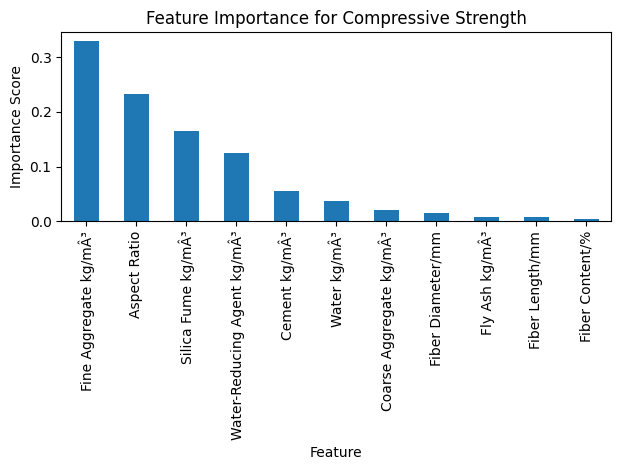

<Figure size 1000x600 with 0 Axes>

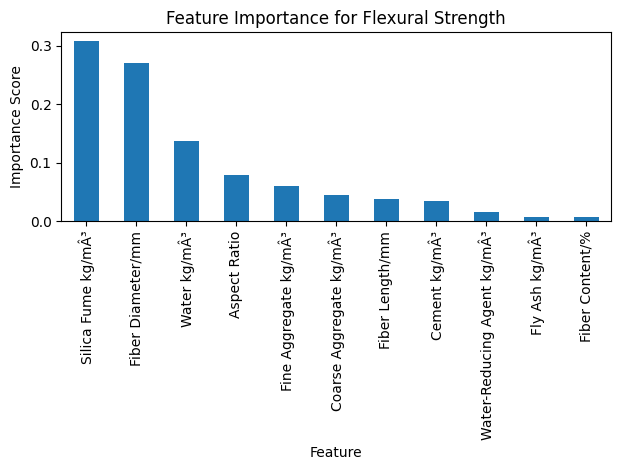

<Figure size 1000x600 with 0 Axes>

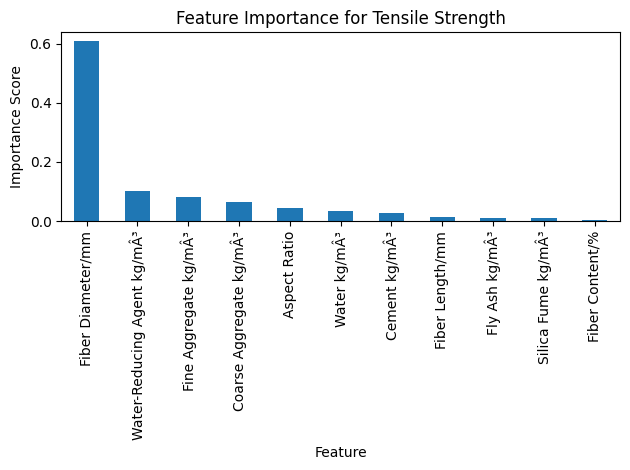

In [ ]:
# Function to plot feature importance
def plot_feature_importance(df_importance, title):
    df_importance.plot(kind='bar', x='Feature', y='Importance', legend=False)
    plt.title(title)
    plt.ylabel('Importance Score')
    plt.tight_layout()

# Plot feature importance for each target
plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_xgb_compressive, 'Feature Importance for Compressive Strength')

plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_xgb_flexural, 'Feature Importance for Flexural Strength')

plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_xgb_tensile, 'Feature Importance for Tensile Strength')

**Permutation Importance**

In [ ]:
%pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=7f32e0788b06650c6c785259b8019eefc977750afbedec9c39f4c7cfc5ddcc0f
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# Compressive Strength
perm_importance_xgb_compressive = PermutationImportance(xgb_model_compressive, random_state=42).fit(X_test_compress, y_test_compress)

# Flexural Strength
perm_importance_xgb_flexural = PermutationImportance(xgb_model_flexural, random_state=42).fit(X_test_flexural, y_test_flexural)

# Tensile Strength
perm_importance_xgb_tensile = PermutationImportance(xgb_model_tensile, random_state=42).fit(X_test_tensile, y_test_tensile)

In [ ]:
# For Compressive Strength
display(eli5.show_weights(perm_importance_xgb_compressive, feature_names=X_test_compress.columns.tolist()))

In [ ]:
eli5.show_weights(perm_importance_xgb_flexural, feature_names=X_test_flexural.columns.tolist())

In [ ]:
eli5.show_weights(perm_importance_xgb_tensile, feature_names=X_test_tensile.columns.tolist())

## CatBoost Feature Importance

In [ ]:
importance_cb_compressive = cb_model_compressive.feature_importances_
importance_cb_flexural = cb_model_flexural.feature_importances_
importance_cb_tensile = cb_model_tensile.feature_importances_

In [ ]:
# Assuming X_train has the same columns for all models, adjust if necessary
feature_names_cb = X_train.columns

# Create a DataFrame for each target variable
df_importance_cb_compressive = pd.DataFrame({'Feature': feature_names, 'Importance': importance_cb_compressive}).sort_values(by='Importance', ascending=False)
df_importance_cb_flexural = pd.DataFrame({'Feature': feature_names, 'Importance': importance_cb_flexural}).sort_values(by='Importance', ascending=False)
df_importance_cb_tensile = pd.DataFrame({'Feature': feature_names, 'Importance': importance_cb_tensile}).sort_values(by='Importance', ascending=False)

In [ ]:
# Display feature importance for compressive strength
print("Feature Importance for Compressive Strength:")
print(df_importance_cb_compressive)
print("\n")  # Add a newline for better readability

# Display feature importance for flexural strength
print("Feature Importance for Flexural Strength:")
print(df_importance_cb_flexural)
print("\n")  # Add a newline for better readability

# Display feature importance for tensile strength
print("Feature Importance for Tensile Strength:")
print(df_importance_cb_tensile)
print("\n")  # Add a newline for better readability

Feature Importance for Compressive Strength:
                        Feature  Importance
0                 Cement kg/mÂ³   19.037342
4         Fine Aggregate kg/mÂ³   18.646412
2            Silica Fume kg/mÂ³   11.132356
3       Coarse Aggregate kg/mÂ³    9.973429
10                 Aspect Ratio    8.346197
6   Water-Reducing Agent kg/mÂ³    7.044571
9               Fiber Content/%    6.232608
5                  Water kg/mÂ³    5.829516
7             Fiber Diameter/mm    5.276709
8               Fiber Length/mm    4.422944
1                Fly Ash kg/mÂ³    4.057917


Feature Importance for Flexural Strength:
                        Feature  Importance
0                 Cement kg/mÂ³   20.357379
8               Fiber Length/mm   16.670954
2            Silica Fume kg/mÂ³   14.527674
3       Coarse Aggregate kg/mÂ³    9.447845
5                  Water kg/mÂ³    7.601390
10                 Aspect Ratio    7.554538
1                Fly Ash kg/mÂ³    7.448733
7             Fiber Diameter/mm

<Figure size 1000x600 with 0 Axes>

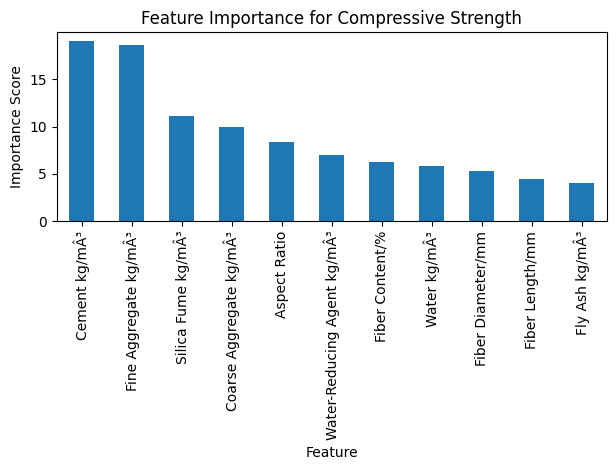

<Figure size 1000x600 with 0 Axes>

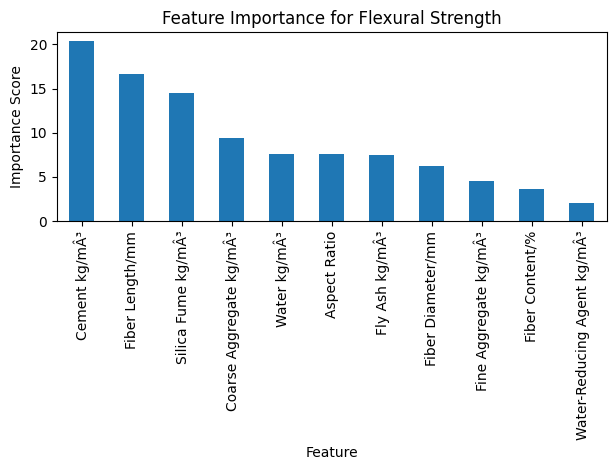

<Figure size 1000x600 with 0 Axes>

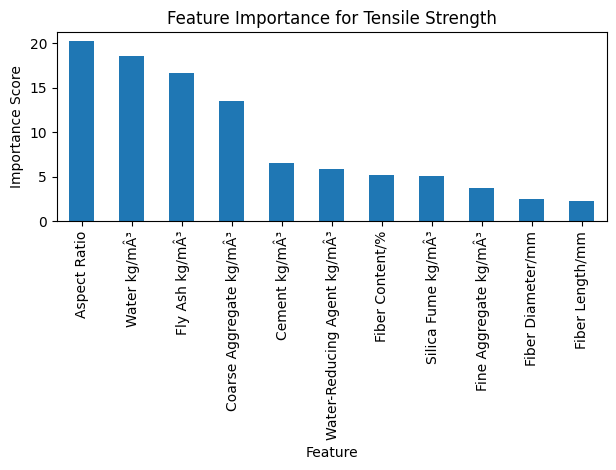

In [ ]:
# Function to plot feature importance
def plot_feature_importance(df_importance, title):
    df_importance.plot(kind='bar', x='Feature', y='Importance', legend=False)
    plt.title(title)
    plt.ylabel('Importance Score')
    plt.tight_layout()

# Plot feature importance for each target
plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_cb_compressive, 'Feature Importance for Compressive Strength')

plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_cb_flexural, 'Feature Importance for Flexural Strength')

plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_cb_tensile, 'Feature Importance for Tensile Strength')

**Permutation Importance**

In [ ]:
# Compressive Strength
perm_importance_cb_compressive = PermutationImportance(cb_model_compressive, random_state=42).fit(X_test_compress, y_test_compress)

# Flexural Strength
perm_importance_cb_flexural = PermutationImportance(cb_model_flexural, random_state=42).fit(X_test_flexural, y_test_flexural)

# Tensile Strength
perm_importance_cb_tensile = PermutationImportance(cb_model_tensile, random_state=42).fit(X_test_tensile, y_test_tensile)

In [ ]:
# For Compressive Strength
display(eli5.show_weights(perm_importance_cb_compressive, feature_names=X_test_compress.columns.tolist()))

In [ ]:
# For Compressive Strength
display(eli5.show_weights(perm_importance_cb_flexural, feature_names=X_test_compress.columns.tolist()))

In [ ]:
# For Compressive Strength
display(eli5.show_weights(perm_importance_cb_tensile, feature_names=X_test_compress.columns.tolist()))

## Random Forest Feature Importance

In [ ]:
importance_rf_compressive = rf_model_compressive.feature_importances_
importance_rf_flexural = rf_model_flexural.feature_importances_
importance_rf_tensile = rf_model_tensile.feature_importances_

In [ ]:
# Assuming X_train has the same columns for all models, adjust if necessary
feature_names_rf = X_train.columns

# Create a DataFrame for each target variable
df_importance_rf_compressive = pd.DataFrame({'Feature': feature_names, 'Importance': importance_rf_compressive}).sort_values(by='Importance', ascending=False)
df_importance_rf_flexural = pd.DataFrame({'Feature': feature_names, 'Importance': importance_rf_flexural}).sort_values(by='Importance', ascending=False)
df_importance_rf_tensile = pd.DataFrame({'Feature': feature_names, 'Importance': importance_rf_tensile}).sort_values(by='Importance', ascending=False)

In [ ]:
# Display feature importance for compressive strength
print("Feature Importance for Compressive Strength:")
print(df_importance_rf_compressive)
print("\n")  # Add a newline for better readability

# Display feature importance for flexural strength
print("Feature Importance for Flexural Strength:")
print(df_importance_rf_flexural)
print("\n")  # Add a newline for better readability

# Display feature importance for tensile strength
print("Feature Importance for Tensile Strength:")
print(df_importance_rf_tensile)
print("\n")  # Add a newline for better readability

Feature Importance for Compressive Strength:
                        Feature  Importance
0                 Cement kg/mÂ³    0.278456
4         Fine Aggregate kg/mÂ³    0.231436
2            Silica Fume kg/mÂ³    0.183457
10                 Aspect Ratio    0.076287
3       Coarse Aggregate kg/mÂ³    0.071010
5                  Water kg/mÂ³    0.049467
6   Water-Reducing Agent kg/mÂ³    0.031188
9               Fiber Content/%    0.027829
1                Fly Ash kg/mÂ³    0.027242
8               Fiber Length/mm    0.015051
7             Fiber Diameter/mm    0.008577


Feature Importance for Flexural Strength:
                        Feature  Importance
2            Silica Fume kg/mÂ³    0.314266
5                  Water kg/mÂ³    0.250354
10                 Aspect Ratio    0.079760
0                 Cement kg/mÂ³    0.078113
3       Coarse Aggregate kg/mÂ³    0.067044
7             Fiber Diameter/mm    0.065149
4         Fine Aggregate kg/mÂ³    0.059252
8               Fiber Length/mm

<Figure size 1000x600 with 0 Axes>

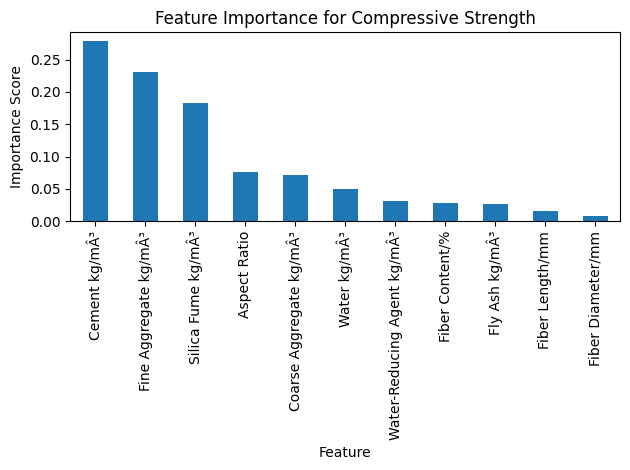

<Figure size 1000x600 with 0 Axes>

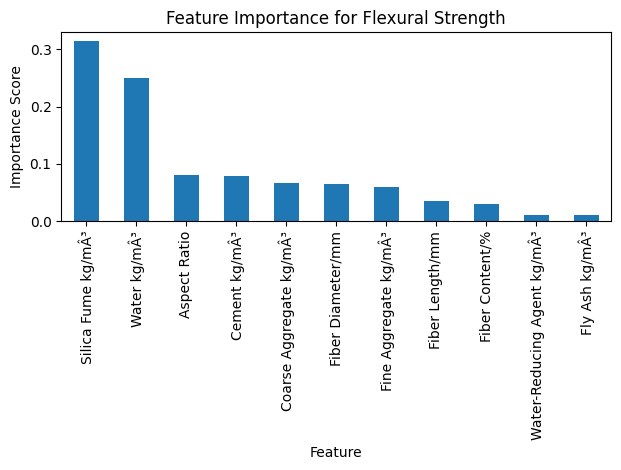

<Figure size 1000x600 with 0 Axes>

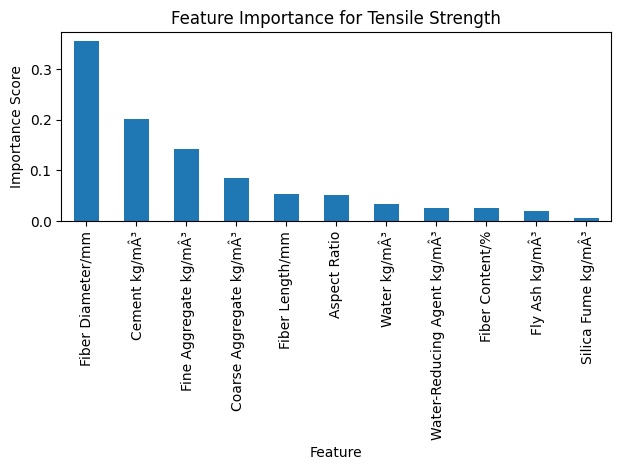

In [ ]:
# Function to plot feature importance
def plot_feature_importance(df_importance, title):
    df_importance.plot(kind='bar', x='Feature', y='Importance', legend=False)
    plt.title(title)
    plt.ylabel('Importance Score')
    plt.tight_layout()

# Plot feature importance for each target
plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_rf_compressive, 'Feature Importance for Compressive Strength')

plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_rf_flexural, 'Feature Importance for Flexural Strength')

plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_rf_tensile, 'Feature Importance for Tensile Strength')

**Permutation Importance**

In [ ]:
# Compressive Strength
perm_importance_rf_compressive = PermutationImportance(rf_model_compressive, random_state=42).fit(X_test_compress, y_test_compress)

# Flexural Strength
perm_importance_rf_flexural = PermutationImportance(rf_model_flexural, random_state=42).fit(X_test_flexural, y_test_flexural)

# Tensile Strength
perm_importance_rf_tensile = PermutationImportance(rf_model_tensile, random_state=42).fit(X_test_tensile, y_test_tensile)

In [ ]:
# For Compressive Strength
display(eli5.show_weights(perm_importance_rf_compressive, feature_names=X_test_compress.columns.tolist()))

In [ ]:
# For Compressive Strength
display(eli5.show_weights(perm_importance_rf_flexural, feature_names=X_test_compress.columns.tolist()))

In [ ]:
# For Compressive Strength
display(eli5.show_weights(perm_importance_rf_tensile, feature_names=X_test_compress.columns.tolist()))

## LightGBM Feature Importance

In [ ]:
importance_lgb_compressive = lgb_model_compressive.feature_importances_
importance_lgb_flexural = lgb_model_flexural.feature_importances_
importance_lgb_tensile = lgb_model_tensile.feature_importances_

In [ ]:
# Assuming X_train has the same columns for all models, adjust if necessary
feature_names_lgb = X_train.columns

# Create a DataFrame for each target variable
df_importance_lgb_compressive = pd.DataFrame({'Feature': feature_names, 'Importance': importance_lgb_compressive}).sort_values(by='Importance', ascending=False)
df_importance_lgb_flexural = pd.DataFrame({'Feature': feature_names, 'Importance': importance_lgb_flexural}).sort_values(by='Importance', ascending=False)
df_importance_lgb_tensile = pd.DataFrame({'Feature': feature_names, 'Importance': importance_lgb_tensile}).sort_values(by='Importance', ascending=False)

In [ ]:
# Display feature importance for compressive strength
print("Feature Importance for Compressive Strength:")
print(df_importance_lgb_compressive)
print("\n")  # Add a newline for better readability

# Display feature importance for flexural strength
print("Feature Importance for Flexural Strength:")
print(df_importance_lgb_flexural)
print("\n")  # Add a newline for better readability

# Display feature importance for tensile strength
print("Feature Importance for Tensile Strength:")
print(df_importance_lgb_tensile)
print("\n")  # Add a newline for better readability

Feature Importance for Compressive Strength:
                        Feature  Importance
9               Fiber Content/%        1259
3       Coarse Aggregate kg/mÂ³         890
0                 Cement kg/mÂ³         854
4         Fine Aggregate kg/mÂ³         854
1                Fly Ash kg/mÂ³         640
6   Water-Reducing Agent kg/mÂ³         596
10                 Aspect Ratio         522
5                  Water kg/mÂ³         506
7             Fiber Diameter/mm         500
8               Fiber Length/mm         436
2            Silica Fume kg/mÂ³         301


Feature Importance for Flexural Strength:
                        Feature  Importance
9               Fiber Content/%        1545
0                 Cement kg/mÂ³         845
3       Coarse Aggregate kg/mÂ³         721
4         Fine Aggregate kg/mÂ³         710
6   Water-Reducing Agent kg/mÂ³         491
10                 Aspect Ratio         447
5                  Water kg/mÂ³         429
1                Fly Ash kg/mÂ³

<Figure size 1000x600 with 0 Axes>

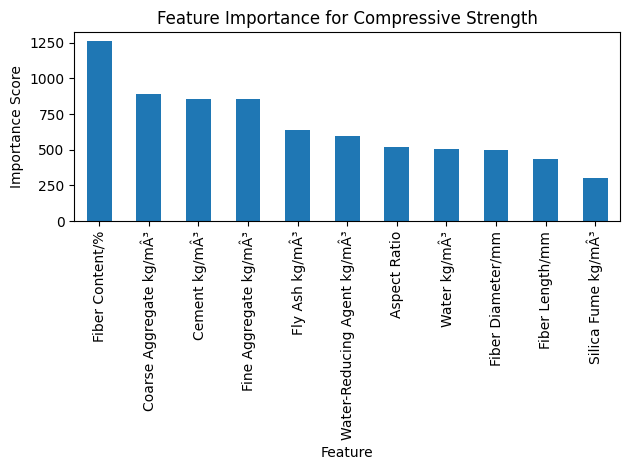

<Figure size 1000x600 with 0 Axes>

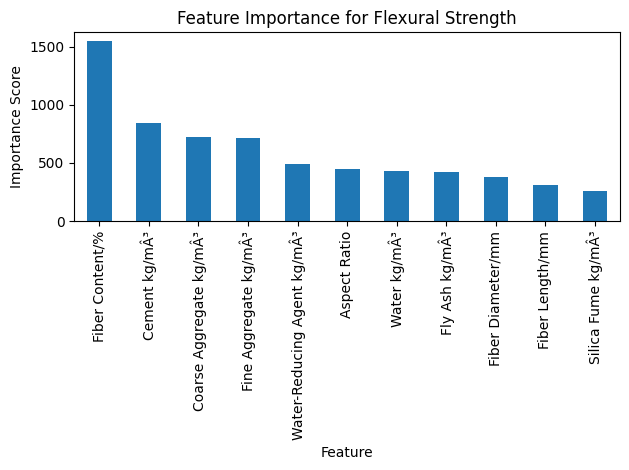

<Figure size 1000x600 with 0 Axes>

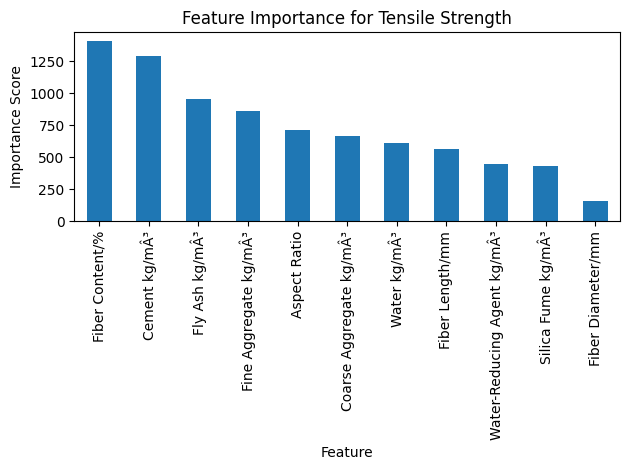

In [ ]:
# Function to plot feature importance
def plot_feature_importance(df_importance, title):
    df_importance.plot(kind='bar', x='Feature', y='Importance', legend=False)
    plt.title(title)
    plt.ylabel('Importance Score')
    plt.tight_layout()

# Plot feature importance for each target
plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_lgb_compressive, 'Feature Importance for Compressive Strength')

plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_lgb_flexural, 'Feature Importance for Flexural Strength')

plt.figure(figsize=(10, 6))
plot_feature_importance(df_importance_lgb_tensile, 'Feature Importance for Tensile Strength')

**Permutation Importance**

In [ ]:
# Compressive Strength
perm_importance_lgb_compressive = PermutationImportance(lgb_model_compressive, random_state=42).fit(X_test_compress, y_test_compress)

# Flexural Strength
perm_importance_lgb_flexural = PermutationImportance(lgb_model_flexural, random_state=42).fit(X_test_flexural, y_test_flexural)

# Tensile Strength
perm_importance_lgb_tensile = PermutationImportance(lgb_model_tensile, random_state=42).fit(X_test_tensile, y_test_tensile)

In [ ]:
# For Compressive Strength
display(eli5.show_weights(perm_importance_lgb_compressive, feature_names=X_test_compress.columns.tolist()))

In [ ]:
# For Flexural Strength
display(eli5.show_weights(perm_importance_lgb_flexural, feature_names=X_test_compress.columns.tolist()))

In [ ]:
# For Compressive Strength
display(eli5.show_weights(perm_importance_lgb_tensile, feature_names=X_test_compress.columns.tolist()))

# SHAP Analysis

## Compressive Strength Model

In [ ]:
pip install --upgrade shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.9 MB/s eta 0:00:00


In [ ]:
import shap

explainer_lgb = shap.TreeExplainer(lgb_model_compressive)
shap_values_lgb = explainer_lgb.shap_values(X_test_compress_scaled)

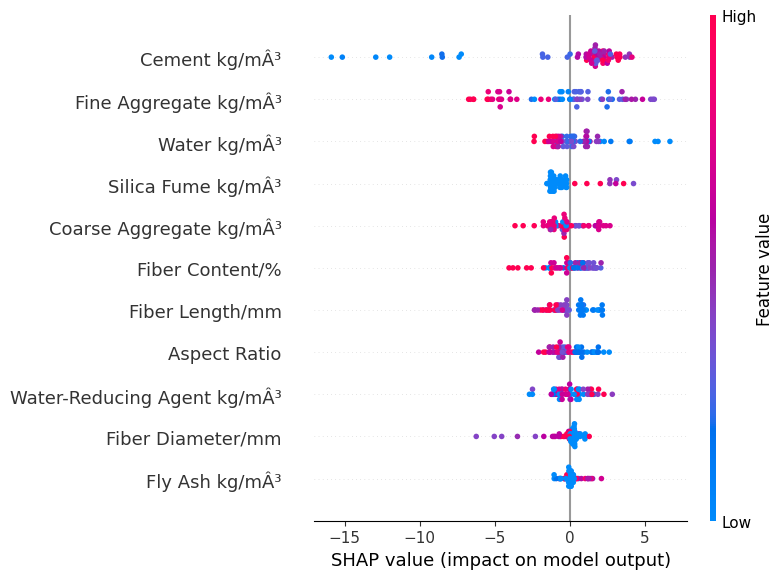

In [ ]:
# Calculate SHAP values - this might take some time depending on your model and data size
shap_values_lgb = explainer_lgb.shap_values(X_test_compress_scaled)  # Use a subset of data if necessary due to computational constraints

shap.summary_plot(shap_values_lgb, X_test_compress_scaled, feature_names=X_test_compress_scaled.columns)

## Flexural Strength Model

In [ ]:
explainer_rf = shap.TreeExplainer(rf_model_flexural)
shap_values_rf = explainer_rf.shap_values(X_test_flexural_scaled)

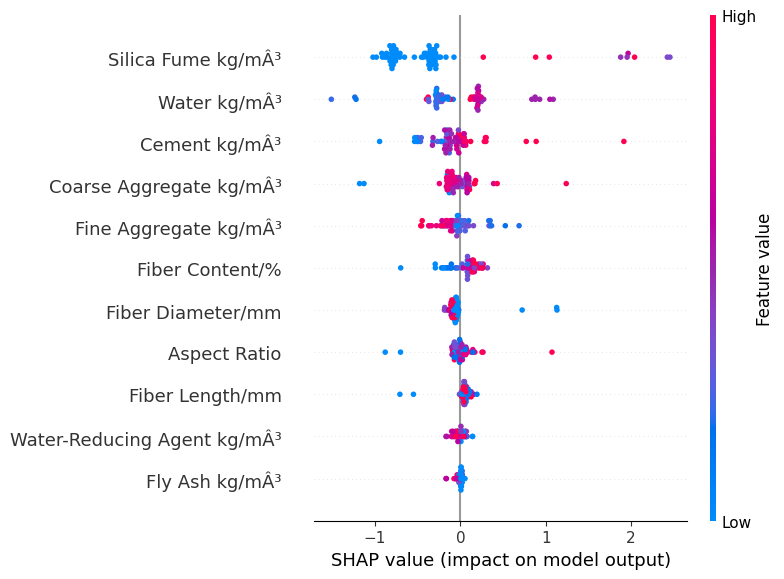

In [ ]:
# Calculate SHAP values - this might take some time depending on your model and data size
shap_values_rf = explainer_rf.shap_values(X_test_flexural_scaled)  # Use a subset of data if necessary due to computational constraints

shap.summary_plot(shap_values_rf, X_test_flexural_scaled, feature_names=X_test_flexural_scaled.columns)

## Tensile Strength Model

In [ ]:
explainer_cb = shap.TreeExplainer(cb_model_tensile)
shap_values_cb = explainer_cb.shap_values(X_test_tensile_scaled)

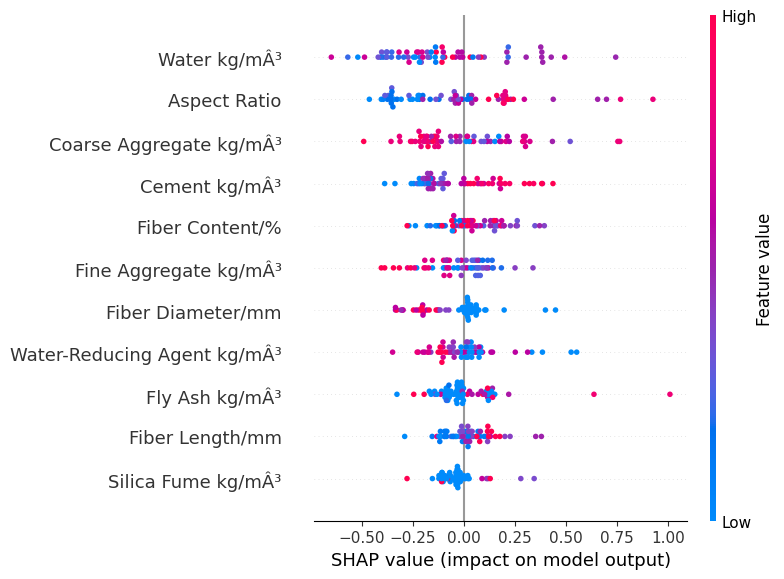

In [ ]:
# Calculate SHAP values - this might take some time depending on your model and data size
shap_values_cb = explainer_cb.shap_values(X_test_tensile_scaled)  # Use a subset of data if necessary due to computational constraints

shap.summary_plot(shap_values_cb, X_test_tensile_scaled, feature_names=X_test_tensile_scaled.columns)

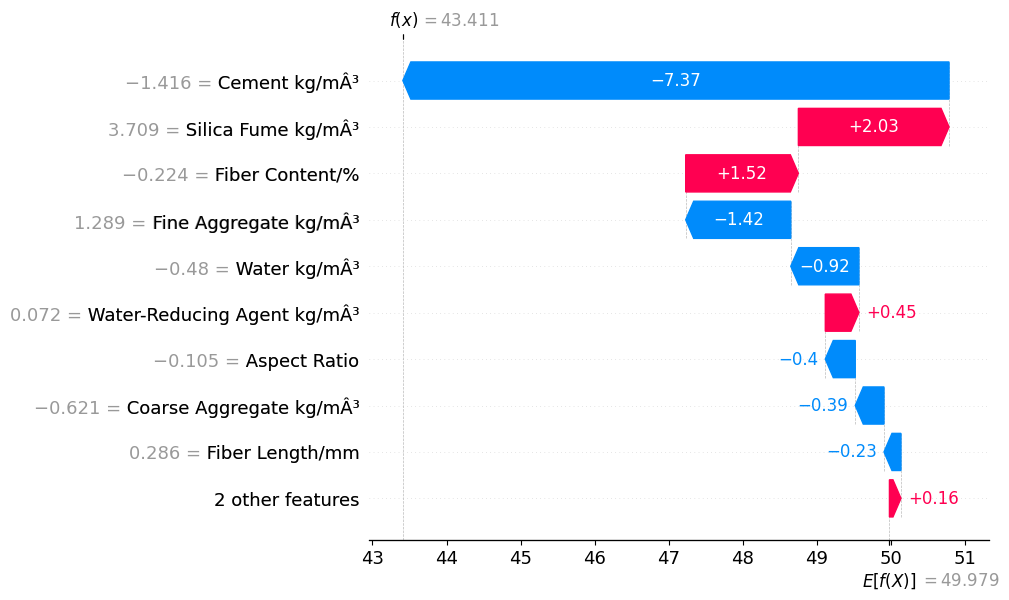

In [ ]:
#explainer = shap.Explainers.Tree(xgb_model_compressive)
shap_values_lgb = explainer_lgb(X_test_compress_scaled)
shap.plots.waterfall(shap_values_lgb[0])

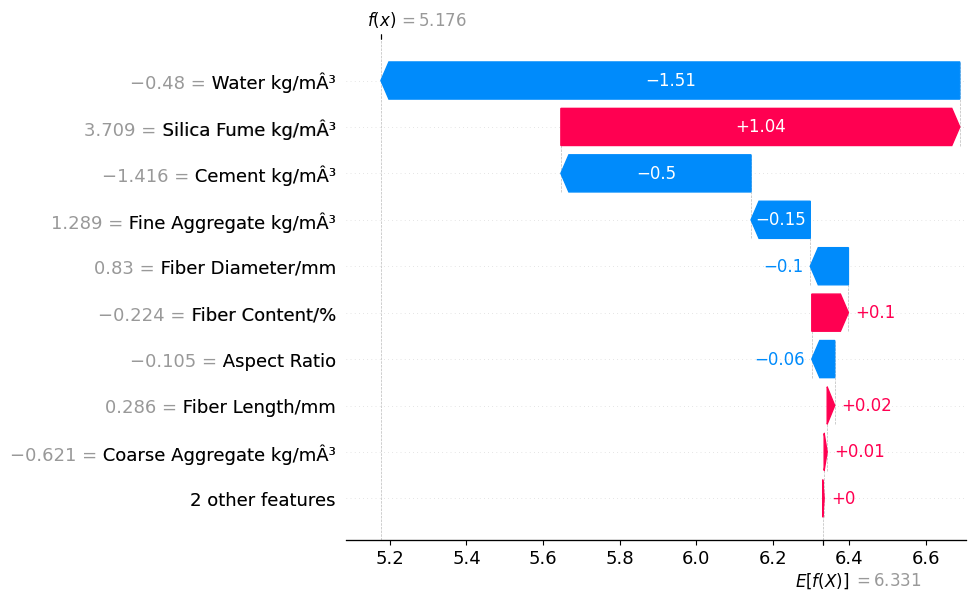

In [ ]:
shap_values_rf = explainer_rf(X_test_flexural_scaled)
shap.plots.waterfall(shap_values_rf[0])

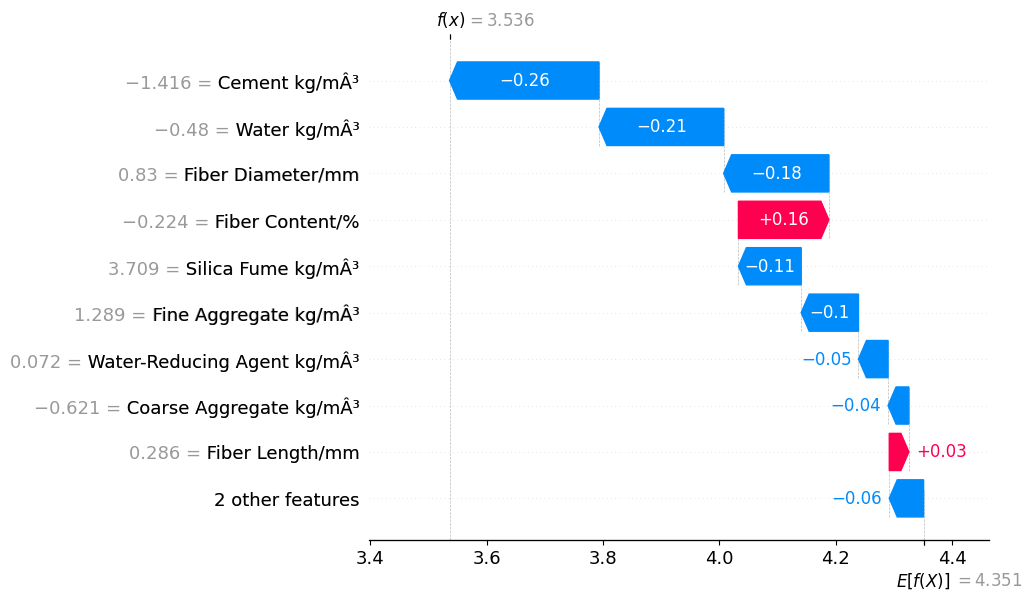

In [ ]:
shap_values_cb = explainer_cb(X_test_tensile_scaled)
shap.plots.waterfall(shap_values_cb[0])

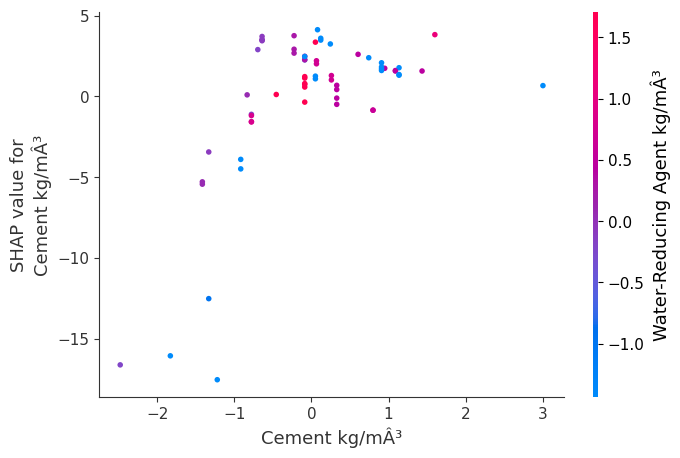

In [ ]:
shap.dependence_plot("Cement kg/mÂ³", shap_values_lgb, X_test_compress_scaled)

# Genetic Algorithm

In [13]:
%pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.2 MB/s eta 0:00:00


In [25]:
from deap import base, creator, tools, algorithms
import random

In [22]:
from deap import base, creator, tools, algorithms
import random

# Objective function
def mix_optimization(individual):
    scaled_input = np.array(individual).reshape(1, -1)  # Reshape for a single sample

    # Predict compressive strength using the LightGBM model
    strength = lgb_model_compressive.predict(scaled_input)
    return strength[0],

# Genetic Algorithm Setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # We want to maximize compressive strength
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)  # Adjust these bounds based on the scaler
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=X_train_compress_scaled.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", mix_optimization)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Running the genetic algorithm
population = toolbox.population(n=50)
ngen = 40  # Number of generations
result = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, verbose=True)

best_ind = tools.selBest(population, 1)[0]
print("Best mix:", best_ind)
print("Best compressive strength:", mix_optimization(best_ind))


gen	nevals
0  	50    
1  	36    
2  	31    
3  	33    
4  	28    
5  	28    
6  	35    
7  	28    
8  	26    
9  	34    
10 	21    
11 	29    
12 	21    
13 	29    
14 	30    
15 	33    
16 	24    
17 	29    
18 	32    
19 	35    
20 	30    
21 	31    
22 	27    
23 	32    
24 	30    
25 	23    
26 	30    
27 	31    
28 	26    
29 	31    
30 	39    
31 	23    
32 	24    
33 	23    
34 	31    
35 	27    
36 	24    
37 	33    
38 	31    
39 	29    
40 	35    
Best mix: [0.5900068374846839, 0.7264488649817089, 1.0468897312825776, 0.14656651186085556, 0.1616683335339696, 0.16641361044426467, -0.024538926240803893, 1.606615765823836, -0.6533401359135036, -0.318067898473729, 1.1876810376668252]
Best compressive strength: (65.84693147465555,)


In [23]:
# Example scaled parameters from your genetic algorithm
scaled_params = np.array([0.604284746172739, 0.5984237451155261, 0.912611939719318, 0.17951343095539574, 0.5525650514037294, 0.203071305477857, 1.558799840571925, -0.08712193875659877, -0.6839788752374418, 1.2009823487237987, -2.0789271442491386])

original_params = scaler.inverse_transform([scaled_params])[0]

# Print original parameters
print("Original Parameters:", original_params)


Original Parameters: [4.39947266e+02 7.47406828e+01 4.23094109e+01 1.13135092e+03
 7.46396962e+02 1.80921210e+02 6.67362221e+00 1.56577037e-02
 1.22781886e+01 2.84372336e-01 2.50669638e+02]


In [ ]:

# Objective function
def mix_optimization(individual):
    scaled_input = np.array(individual).reshape(1, -1)  # Reshape for a single sample

    # Predict flexural strength using the RandomForest model
    strength = rf_model_flexural.predict(scaled_input)
    return strength[0],

# Genetic Algorithm Setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # We want to maximize flexural strength
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)  # Adjust these bounds based on the scaler
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=X_train_flexural_scaled.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", mix_optimization)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Running the genetic algorithm
population = toolbox.population(n=50)
ngen = 40  # Number of generations
result = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, verbose=True)

best_ind = tools.selBest(population, 1)[0]
print("Best mix:", best_ind)
print("Best flexural strength:", mix_optimization(best_ind))

gen	nevals
0  	50    
1  	41    
2  	40    
3  	34    
4  	24    
5  	26    
6  	30    
7  	26    
8  	26    
9  	37    
10 	30    
11 	27    
12 	28    
13 	32    
14 	27    
15 	29    
16 	22    
17 	30    
18 	31    
19 	27    
20 	24    
21 	31    
22 	28    
23 	28    
24 	20    
25 	22    
26 	32    
27 	27    
28 	31    
29 	29    
30 	23    
31 	30    
32 	30    
33 	24    
34 	32    
35 	34    
36 	39    
37 	29    
38 	28    
39 	18    
40 	23    
Best mix: [0.5394600116971804, 0.45720895841670617, 0.23404036091976343, -2.1199633626062964, -0.27582921538336136, 0.837759522338307, -0.5461001463743901, 0.03786855033072847, 0.9126122203925688, 0.02476364702119836, 0.8380479109557434]
Best flexural strength: (10.602161992168373,)


In [ ]:
# New best mix parameters from genetic algorithm using the new model
rf_best_mix = np.array([0.5394600116971804, 0.45720895841670617, 0.23404036091976343, -2.1199633626062964, -0.27582921538336136, 0.837759522338307, -0.5461001463743901, 0.03786855033072847, 0.9126122203925688, 0.02476364702119836, 0.8380479109557434])

# Inverse transform the new best mix parameters to their original scale
original_params_rf_mix = scaler.inverse_transform([rf_best_mix])[0]

# Print the descaled parameters
print("Original Parameters from new best mix:", original_params_new_mix)

Original Parameters from new best mix: [4.35264134e+02 6.70327268e+01 2.19986488e+01 7.48537991e+02
 6.67027596e+02 2.00373706e+02 1.98375078e+00 1.59770668e-02
 2.16959224e+01 1.32162103e-01 1.35818743e+03]


In [26]:
# Objective function
def mix_optimization(individual):
    scaled_input = np.array(individual).reshape(1, -1)  # Reshape for a single sample

    # Predict compressive strength using the LightGBM model
    strength_tensile = cb_model_tensile.predict(scaled_input)
    return strength_tensile[0],

# Genetic Algorithm Setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # We want to maximize compressive strength
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)  # Adjust these bounds based on the scaler
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=X_train_tensile_scaled.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", mix_optimization)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Running the genetic algorithm
population = toolbox.population(n=50)
ngen = 40  # Number of generations
result = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, verbose=True)

best_ind = tools.selBest(population, 1)[0]
print("Best mix:", best_ind)
print("Best Tensile strength:", mix_optimization(best_ind))

gen	nevals
0  	50    
1  	29    
2  	31    
3  	35    
4  	32    
5  	27    
6  	34    
7  	40    
8  	33    
9  	34    
10 	21    
11 	37    
12 	33    
13 	30    
14 	28    
15 	30    
16 	27    
17 	24    
18 	24    
19 	30    
20 	36    
21 	31    
22 	35    
23 	29    
24 	34    
25 	20    
26 	33    
27 	30    
28 	26    
29 	20    
30 	33    
31 	32    
32 	29    
33 	30    
34 	33    
35 	28    
36 	22    
37 	38    
38 	30    
39 	30    
40 	31    
Best mix: [0.4268309273663218, 0.8159114155472662, -0.04052415352377389, -0.24434761237132704, 0.0379134222385743, 0.5367822583065669, -0.4760253385288276, -0.25592642400209276, 0.4845670468435436, 0.07593436894062403, 0.8803229533083087]
Best Tensile strength: (7.158154994283331,)


In [27]:
cb_best_mix = np.array([0.6757136717654904, 0.9707128542291622, 0.4173344460834856, -0.33654027185310165, 0.06579657424366779, 0.3211043275624902, -0.4764363122092993, -0.8688896249930972, 0.7060234297821559, -0.22015956972410344, 1.1690549270699386])

# Inverse transform the new best mix parameters to their original scale
original_params_cb_mix = scaler.inverse_transform([cb_best_mix])[0]

# Print the descaled parameters
print("Original Parameters from new best mix:", original_params_cb_mix)

Original Parameters from new best mix: [4.45107505e+02 9.50614165e+01 2.74849418e+01 1.04543919e+03
 6.99759139e+02 1.84538792e+02 2.13896691e+00 1.36602098e-02
 2.04773272e+01 1.00467471e-01 1.48386426e+03]
